In [27]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

import pandas as pd


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import Adam
#from sklearn.utils import shuffle
import csv

#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
#missing value handle
from sklearn.preprocessing import Imputer
#To shuffle the data set
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

import itertools

from scipy.stats import zscore

import os


In [2]:
data_frame = pd.read_csv('data.tab', sep='\t')

len(data_frame)

834

In [3]:
data_frame.head(2)

,50.0,1.0,0.0,0.0.1,0.0.2,1.0.1,0.0.3,1.0.2,0.0.4,0.0.5,1.0.3,0.0.6,0.0.7,0.0.8,0.0.9
0,55.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,47.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#suffle the data set
#np.random.seed(40)
df = data_frame.reindex(np.random.permutation(data_frame.index))
df.reset_index(inplace=True,drop=True)

In [21]:
data_set = df.values

In [22]:
X = data_set[:,:14]
Y = data_set[:,14:]


In [23]:
data_frame.head(2)

,50.0,1.0,0.0,0.0.1,0.0.2,1.0.1,0.0.3,1.0.2,0.0.4,0.0.5,1.0.3,0.0.6,0.0.7,0.0.8,0.0.9
0,55.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1,47.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
kf = KFold(10)

In [68]:
oos_y = []
oos_pred = []
fold = 0
kfold_validation_score_store = []

terget_names = ["NO","YES"]

In [93]:
'''
model = Sequential([
    Dense(16,input_shape=(14,),activation="relu"),
    Dense(32,activation="relu"),
    Dense(32,activation="relu"),
    Dense(40,activation="relu"),
    Dense(54,activation="relu"),
    Dense(2,activation="softmax")
    ])
'''
model = Sequential([
    Dense(8,input_shape=(14,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])

model.compile(
    Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [34]:
fold = 0
for train,test in kf.split(X):
    fold += 1
    print("fold #{}".format(fold))
    x_train = X[train]
    y_train = Y[train]
    x_test = X[test]
    y_test = Y[test]
    
    model = Sequential([
    Dense(8,input_shape=(14,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])

    model.compile(
        Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy']
    )
    
    model.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size=10,epochs=1000,shuffle=True,verbose=2)
    
    model.save("heart_attack_risk_prediction_fold_no_"+str(fold)+"_with_cross_validation.h5")
    
    #rounded_predections = model.predict_classes(X_test,batch_size=10,verbose=0)
    pred = model.predict(x_test)
    pred_class = model.predict_classes(x_test)
    score = model.evaluate(x_test, y_test)
    kfold_validation_score_store.append(score)
    #oos_y.append(y_test)
    #pred
    #oos_pred.append(pred)
    #score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print("\nFold {0} score : {1}".format(fold,score))
    print("\n\n")
    print(classification_report(pred_class,y_test,target_names=terget_names))
    print("\n\nnew\n\n")
    #break

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/1000
 - 1s - loss: 0.8041 - acc: 0.3907 - val_loss: 0.7331 - val_acc: 0.4524
Epoch 2/1000
 - 0s - loss: 0.7264 - acc: 0.3920 - val_loss: 0.6897 - val_acc: 0.4643
Epoch 3/1000
 - 0s - loss: 0.6828 - acc: 0.6200 - val_loss: 0.6744 - val_acc: 0.6310
Epoch 4/1000
 - 0s - loss: 0.6642 - acc: 0.6493 - val_loss: 0.6706 - val_acc: 0.5714
Epoch 5/1000
 - 0s - loss: 0.6556 - acc: 0.6147 - val_loss: 0.6693 - val_acc: 0.5476
Epoch 6/1000
 - 0s - loss: 0.6497 - acc: 0.6107 - val_loss: 0.6699 - val_acc: 0.5476
Epoch 7/1000
 - 0s - loss: 0.6457 - acc: 0.6093 - val_loss: 0.6707 - val_acc: 0.5476
Epoch 8/1000
 - 0s - loss: 0.6437 - acc: 0.6093 - val_loss: 0.6713 - val_acc: 0.5476
Epoch 9/1000
 - 0s - loss: 0.6416 - acc: 0.6093 - val_loss: 0.6693 - val_acc: 0.5476
Epoch 10/1000
 - 0s - loss: 0.6401 - acc: 0.6093 - val_loss: 0.6701 - val_acc: 0.5476
Epoch 11/1000
 - 0s - loss: 0.6389 - acc: 0.6093 - val_loss: 0.6688 - val_acc: 0.5476
Epoch 12/1

Epoch 96/1000
 - 0s - loss: 0.4359 - acc: 0.8413 - val_loss: 0.5348 - val_acc: 0.7381
Epoch 97/1000
 - 0s - loss: 0.4345 - acc: 0.8360 - val_loss: 0.5354 - val_acc: 0.7381
Epoch 98/1000
 - 0s - loss: 0.4340 - acc: 0.8360 - val_loss: 0.5336 - val_acc: 0.7381
Epoch 99/1000
 - 0s - loss: 0.4326 - acc: 0.8387 - val_loss: 0.5430 - val_acc: 0.7381
Epoch 100/1000
 - 0s - loss: 0.4303 - acc: 0.8387 - val_loss: 0.5326 - val_acc: 0.7500
Epoch 101/1000
 - 0s - loss: 0.4310 - acc: 0.8413 - val_loss: 0.5310 - val_acc: 0.7500
Epoch 102/1000
 - 0s - loss: 0.4286 - acc: 0.8400 - val_loss: 0.5383 - val_acc: 0.7381
Epoch 103/1000
 - 0s - loss: 0.4273 - acc: 0.8373 - val_loss: 0.5413 - val_acc: 0.7381
Epoch 104/1000
 - 0s - loss: 0.4262 - acc: 0.8387 - val_loss: 0.5453 - val_acc: 0.7381
Epoch 105/1000
 - 0s - loss: 0.4252 - acc: 0.8413 - val_loss: 0.5511 - val_acc: 0.7381
Epoch 106/1000
 - 0s - loss: 0.4246 - acc: 0.8440 - val_loss: 0.5330 - val_acc: 0.7381
Epoch 107/1000
 - 0s - loss: 0.4228 - acc: 0.84

Epoch 191/1000
 - 0s - loss: 0.3889 - acc: 0.8467 - val_loss: 0.5805 - val_acc: 0.7500
Epoch 192/1000
 - 0s - loss: 0.3879 - acc: 0.8520 - val_loss: 0.5752 - val_acc: 0.7500
Epoch 193/1000
 - 0s - loss: 0.3874 - acc: 0.8507 - val_loss: 0.5770 - val_acc: 0.7500
Epoch 194/1000
 - 0s - loss: 0.3868 - acc: 0.8467 - val_loss: 0.5814 - val_acc: 0.7500
Epoch 195/1000
 - 0s - loss: 0.3865 - acc: 0.8533 - val_loss: 0.5745 - val_acc: 0.7381
Epoch 196/1000
 - 0s - loss: 0.3867 - acc: 0.8507 - val_loss: 0.5835 - val_acc: 0.7381
Epoch 197/1000
 - 0s - loss: 0.3886 - acc: 0.8507 - val_loss: 0.5811 - val_acc: 0.7500
Epoch 198/1000
 - 0s - loss: 0.3867 - acc: 0.8507 - val_loss: 0.5812 - val_acc: 0.7500
Epoch 199/1000
 - 0s - loss: 0.3862 - acc: 0.8520 - val_loss: 0.5819 - val_acc: 0.7500
Epoch 200/1000
 - 0s - loss: 0.3862 - acc: 0.8520 - val_loss: 0.5790 - val_acc: 0.7500
Epoch 201/1000
 - 0s - loss: 0.3863 - acc: 0.8507 - val_loss: 0.5847 - val_acc: 0.7381
Epoch 202/1000
 - 0s - loss: 0.3861 - acc: 

 - 0s - loss: 0.3791 - acc: 0.8627 - val_loss: 0.5891 - val_acc: 0.7262
Epoch 286/1000
 - 0s - loss: 0.3787 - acc: 0.8573 - val_loss: 0.5879 - val_acc: 0.7381
Epoch 287/1000
 - 0s - loss: 0.3778 - acc: 0.8613 - val_loss: 0.5886 - val_acc: 0.7381
Epoch 288/1000
 - 0s - loss: 0.3783 - acc: 0.8640 - val_loss: 0.5872 - val_acc: 0.7381
Epoch 289/1000
 - 0s - loss: 0.3772 - acc: 0.8587 - val_loss: 0.5892 - val_acc: 0.7262
Epoch 290/1000
 - 0s - loss: 0.3776 - acc: 0.8560 - val_loss: 0.5882 - val_acc: 0.7381
Epoch 291/1000
 - 0s - loss: 0.3777 - acc: 0.8587 - val_loss: 0.5885 - val_acc: 0.7262
Epoch 292/1000
 - 0s - loss: 0.3771 - acc: 0.8613 - val_loss: 0.5874 - val_acc: 0.7381
Epoch 293/1000
 - 0s - loss: 0.3769 - acc: 0.8600 - val_loss: 0.5880 - val_acc: 0.7381
Epoch 294/1000
 - 0s - loss: 0.3780 - acc: 0.8613 - val_loss: 0.5894 - val_acc: 0.7262
Epoch 295/1000
 - 0s - loss: 0.3784 - acc: 0.8587 - val_loss: 0.5871 - val_acc: 0.7381
Epoch 296/1000
 - 0s - loss: 0.3774 - acc: 0.8600 - val_lo

Epoch 380/1000
 - 0s - loss: 0.3722 - acc: 0.8560 - val_loss: 0.5893 - val_acc: 0.7262
Epoch 381/1000
 - 0s - loss: 0.3730 - acc: 0.8640 - val_loss: 0.5912 - val_acc: 0.7262
Epoch 382/1000
 - 0s - loss: 0.3725 - acc: 0.8613 - val_loss: 0.5885 - val_acc: 0.7262
Epoch 383/1000
 - 0s - loss: 0.3721 - acc: 0.8627 - val_loss: 0.5885 - val_acc: 0.7381
Epoch 384/1000
 - 0s - loss: 0.3718 - acc: 0.8640 - val_loss: 0.5908 - val_acc: 0.7262
Epoch 385/1000
 - 0s - loss: 0.3718 - acc: 0.8640 - val_loss: 0.5935 - val_acc: 0.7262
Epoch 386/1000
 - 0s - loss: 0.3719 - acc: 0.8627 - val_loss: 0.5904 - val_acc: 0.7262
Epoch 387/1000
 - 0s - loss: 0.3725 - acc: 0.8653 - val_loss: 0.5915 - val_acc: 0.7262
Epoch 388/1000
 - 0s - loss: 0.3717 - acc: 0.8627 - val_loss: 0.5927 - val_acc: 0.7381
Epoch 389/1000
 - 0s - loss: 0.3716 - acc: 0.8627 - val_loss: 0.5914 - val_acc: 0.7262
Epoch 390/1000
 - 0s - loss: 0.3724 - acc: 0.8640 - val_loss: 0.5916 - val_acc: 0.7262
Epoch 391/1000
 - 0s - loss: 0.3739 - acc: 

 - 0s - loss: 0.3697 - acc: 0.8640 - val_loss: 0.6000 - val_acc: 0.7262
Epoch 475/1000
 - 0s - loss: 0.3694 - acc: 0.8627 - val_loss: 0.5983 - val_acc: 0.7262
Epoch 476/1000
 - 0s - loss: 0.3692 - acc: 0.8653 - val_loss: 0.6008 - val_acc: 0.7262
Epoch 477/1000
 - 0s - loss: 0.3700 - acc: 0.8627 - val_loss: 0.5966 - val_acc: 0.7381
Epoch 478/1000
 - 0s - loss: 0.3702 - acc: 0.8653 - val_loss: 0.5964 - val_acc: 0.7381
Epoch 479/1000
 - 0s - loss: 0.3692 - acc: 0.8653 - val_loss: 0.6001 - val_acc: 0.7262
Epoch 480/1000
 - 0s - loss: 0.3700 - acc: 0.8667 - val_loss: 0.5996 - val_acc: 0.7262
Epoch 481/1000
 - 0s - loss: 0.3706 - acc: 0.8640 - val_loss: 0.5959 - val_acc: 0.7262
Epoch 482/1000
 - 0s - loss: 0.3697 - acc: 0.8640 - val_loss: 0.6002 - val_acc: 0.7262
Epoch 483/1000
 - 0s - loss: 0.3693 - acc: 0.8627 - val_loss: 0.5955 - val_acc: 0.7143
Epoch 484/1000
 - 0s - loss: 0.3703 - acc: 0.8640 - val_loss: 0.5977 - val_acc: 0.7262
Epoch 485/1000
 - 0s - loss: 0.3699 - acc: 0.8667 - val_lo

Epoch 569/1000
 - 0s - loss: 0.3697 - acc: 0.8653 - val_loss: 0.5953 - val_acc: 0.7262
Epoch 570/1000
 - 0s - loss: 0.3683 - acc: 0.8653 - val_loss: 0.6022 - val_acc: 0.7262
Epoch 571/1000
 - 0s - loss: 0.3678 - acc: 0.8627 - val_loss: 0.5946 - val_acc: 0.7262
Epoch 572/1000
 - 0s - loss: 0.3690 - acc: 0.8667 - val_loss: 0.5969 - val_acc: 0.7381
Epoch 573/1000
 - 0s - loss: 0.3691 - acc: 0.8653 - val_loss: 0.6039 - val_acc: 0.7262
Epoch 574/1000
 - 0s - loss: 0.3698 - acc: 0.8680 - val_loss: 0.5993 - val_acc: 0.7381
Epoch 575/1000
 - 0s - loss: 0.3681 - acc: 0.8640 - val_loss: 0.6032 - val_acc: 0.7262
Epoch 576/1000
 - 0s - loss: 0.3692 - acc: 0.8653 - val_loss: 0.5976 - val_acc: 0.7381
Epoch 577/1000
 - 0s - loss: 0.3685 - acc: 0.8667 - val_loss: 0.5989 - val_acc: 0.7381
Epoch 578/1000
 - 0s - loss: 0.3683 - acc: 0.8653 - val_loss: 0.6002 - val_acc: 0.7262
Epoch 579/1000
 - 0s - loss: 0.3679 - acc: 0.8653 - val_loss: 0.5994 - val_acc: 0.7381
Epoch 580/1000
 - 0s - loss: 0.3682 - acc: 

 - 0s - loss: 0.3684 - acc: 0.8600 - val_loss: 0.6023 - val_acc: 0.7262
Epoch 664/1000
 - 0s - loss: 0.3680 - acc: 0.8640 - val_loss: 0.6005 - val_acc: 0.7262
Epoch 665/1000
 - 0s - loss: 0.3683 - acc: 0.8653 - val_loss: 0.5982 - val_acc: 0.7262
Epoch 666/1000
 - 0s - loss: 0.3682 - acc: 0.8627 - val_loss: 0.5984 - val_acc: 0.7381
Epoch 667/1000
 - 0s - loss: 0.3714 - acc: 0.8587 - val_loss: 0.6044 - val_acc: 0.7262
Epoch 668/1000
 - 0s - loss: 0.3688 - acc: 0.8680 - val_loss: 0.6012 - val_acc: 0.7262
Epoch 669/1000
 - 0s - loss: 0.3674 - acc: 0.8627 - val_loss: 0.6047 - val_acc: 0.7262
Epoch 670/1000
 - 0s - loss: 0.3704 - acc: 0.8600 - val_loss: 0.6011 - val_acc: 0.7262
Epoch 671/1000
 - 0s - loss: 0.3679 - acc: 0.8640 - val_loss: 0.5981 - val_acc: 0.7381
Epoch 672/1000
 - 0s - loss: 0.3717 - acc: 0.8573 - val_loss: 0.6029 - val_acc: 0.7262
Epoch 673/1000
 - 0s - loss: 0.3672 - acc: 0.8640 - val_loss: 0.6002 - val_acc: 0.7262
Epoch 674/1000
 - 0s - loss: 0.3676 - acc: 0.8667 - val_lo

Epoch 758/1000
 - 0s - loss: 0.3664 - acc: 0.8667 - val_loss: 0.6024 - val_acc: 0.7262
Epoch 759/1000
 - 0s - loss: 0.3676 - acc: 0.8613 - val_loss: 0.5976 - val_acc: 0.7262
Epoch 760/1000
 - 0s - loss: 0.3667 - acc: 0.8653 - val_loss: 0.6040 - val_acc: 0.7262
Epoch 761/1000
 - 0s - loss: 0.3684 - acc: 0.8640 - val_loss: 0.6013 - val_acc: 0.7262
Epoch 762/1000
 - 0s - loss: 0.3669 - acc: 0.8627 - val_loss: 0.5978 - val_acc: 0.7381
Epoch 763/1000
 - 0s - loss: 0.3665 - acc: 0.8640 - val_loss: 0.5999 - val_acc: 0.7262
Epoch 764/1000
 - 0s - loss: 0.3664 - acc: 0.8640 - val_loss: 0.6007 - val_acc: 0.7262
Epoch 765/1000
 - 0s - loss: 0.3664 - acc: 0.8640 - val_loss: 0.6036 - val_acc: 0.7262
Epoch 766/1000
 - 0s - loss: 0.3666 - acc: 0.8653 - val_loss: 0.6010 - val_acc: 0.7262
Epoch 767/1000
 - 0s - loss: 0.3667 - acc: 0.8640 - val_loss: 0.5991 - val_acc: 0.7381
Epoch 768/1000
 - 0s - loss: 0.3666 - acc: 0.8653 - val_loss: 0.6010 - val_acc: 0.7262
Epoch 769/1000
 - 0s - loss: 0.3676 - acc: 

 - 0s - loss: 0.3661 - acc: 0.8680 - val_loss: 0.5968 - val_acc: 0.7381
Epoch 853/1000
 - 0s - loss: 0.3665 - acc: 0.8653 - val_loss: 0.5961 - val_acc: 0.7381
Epoch 854/1000
 - 0s - loss: 0.3665 - acc: 0.8653 - val_loss: 0.6004 - val_acc: 0.7262
Epoch 855/1000
 - 0s - loss: 0.3664 - acc: 0.8653 - val_loss: 0.5948 - val_acc: 0.7262
Epoch 856/1000
 - 0s - loss: 0.3667 - acc: 0.8653 - val_loss: 0.5964 - val_acc: 0.7381
Epoch 857/1000
 - 0s - loss: 0.3663 - acc: 0.8640 - val_loss: 0.5979 - val_acc: 0.7381
Epoch 858/1000
 - 0s - loss: 0.3663 - acc: 0.8680 - val_loss: 0.5993 - val_acc: 0.7262
Epoch 859/1000
 - 0s - loss: 0.3664 - acc: 0.8640 - val_loss: 0.5993 - val_acc: 0.7262
Epoch 860/1000
 - 0s - loss: 0.3664 - acc: 0.8613 - val_loss: 0.5996 - val_acc: 0.7262
Epoch 861/1000
 - 0s - loss: 0.3673 - acc: 0.8653 - val_loss: 0.6038 - val_acc: 0.7262
Epoch 862/1000
 - 0s - loss: 0.3655 - acc: 0.8667 - val_loss: 0.5965 - val_acc: 0.7262
Epoch 863/1000
 - 0s - loss: 0.3677 - acc: 0.8653 - val_lo

Epoch 947/1000
 - 0s - loss: 0.3660 - acc: 0.8667 - val_loss: 0.5984 - val_acc: 0.7381
Epoch 948/1000
 - 0s - loss: 0.3662 - acc: 0.8667 - val_loss: 0.6020 - val_acc: 0.7262
Epoch 949/1000
 - 0s - loss: 0.3659 - acc: 0.8667 - val_loss: 0.5990 - val_acc: 0.7381
Epoch 950/1000
 - 0s - loss: 0.3666 - acc: 0.8667 - val_loss: 0.5987 - val_acc: 0.7381
Epoch 951/1000
 - 0s - loss: 0.3654 - acc: 0.8613 - val_loss: 0.5958 - val_acc: 0.7381
Epoch 952/1000
 - 0s - loss: 0.3666 - acc: 0.8667 - val_loss: 0.5984 - val_acc: 0.7381
Epoch 953/1000
 - 0s - loss: 0.3665 - acc: 0.8613 - val_loss: 0.5945 - val_acc: 0.7381
Epoch 954/1000
 - 0s - loss: 0.3659 - acc: 0.8667 - val_loss: 0.5975 - val_acc: 0.7381
Epoch 955/1000
 - 0s - loss: 0.3669 - acc: 0.8627 - val_loss: 0.5963 - val_acc: 0.7500
Epoch 956/1000
 - 0s - loss: 0.3659 - acc: 0.8667 - val_loss: 0.6040 - val_acc: 0.7262
Epoch 957/1000
 - 0s - loss: 0.3652 - acc: 0.8653 - val_loss: 0.6034 - val_acc: 0.7262
Epoch 958/1000
 - 0s - loss: 0.3651 - acc: 

Epoch 36/1000
 - 0s - loss: 0.6550 - acc: 0.6013 - val_loss: 0.6492 - val_acc: 0.6190
Epoch 37/1000
 - 0s - loss: 0.6548 - acc: 0.6013 - val_loss: 0.6485 - val_acc: 0.6190
Epoch 38/1000
 - 0s - loss: 0.6537 - acc: 0.6013 - val_loss: 0.6467 - val_acc: 0.6190
Epoch 39/1000
 - 0s - loss: 0.6478 - acc: 0.6013 - val_loss: 0.6408 - val_acc: 0.6190
Epoch 40/1000
 - 0s - loss: 0.6428 - acc: 0.6013 - val_loss: 0.6363 - val_acc: 0.6190
Epoch 41/1000
 - 0s - loss: 0.6381 - acc: 0.6027 - val_loss: 0.6347 - val_acc: 0.6190
Epoch 42/1000
 - 0s - loss: 0.6332 - acc: 0.6040 - val_loss: 0.6300 - val_acc: 0.6190
Epoch 43/1000
 - 0s - loss: 0.6298 - acc: 0.6053 - val_loss: 0.6271 - val_acc: 0.6190
Epoch 44/1000
 - 0s - loss: 0.6263 - acc: 0.6080 - val_loss: 0.6242 - val_acc: 0.6310
Epoch 45/1000
 - 0s - loss: 0.6225 - acc: 0.6107 - val_loss: 0.6235 - val_acc: 0.6310
Epoch 46/1000
 - 0s - loss: 0.6201 - acc: 0.6133 - val_loss: 0.6195 - val_acc: 0.6310
Epoch 47/1000
 - 0s - loss: 0.6156 - acc: 0.6213 - val

Epoch 131/1000
 - 0s - loss: 0.4611 - acc: 0.8320 - val_loss: 0.4952 - val_acc: 0.8333
Epoch 132/1000
 - 0s - loss: 0.4596 - acc: 0.8373 - val_loss: 0.4943 - val_acc: 0.8095
Epoch 133/1000
 - 0s - loss: 0.4599 - acc: 0.8293 - val_loss: 0.4926 - val_acc: 0.8214
Epoch 134/1000
 - 0s - loss: 0.4580 - acc: 0.8333 - val_loss: 0.4919 - val_acc: 0.8214
Epoch 135/1000
 - 0s - loss: 0.4563 - acc: 0.8293 - val_loss: 0.4923 - val_acc: 0.8095
Epoch 136/1000
 - 0s - loss: 0.4570 - acc: 0.8293 - val_loss: 0.4921 - val_acc: 0.7976
Epoch 137/1000
 - 0s - loss: 0.4524 - acc: 0.8347 - val_loss: 0.4935 - val_acc: 0.8333
Epoch 138/1000
 - 0s - loss: 0.4569 - acc: 0.8320 - val_loss: 0.4891 - val_acc: 0.8214
Epoch 139/1000
 - 0s - loss: 0.4533 - acc: 0.8333 - val_loss: 0.4887 - val_acc: 0.8095
Epoch 140/1000
 - 0s - loss: 0.4550 - acc: 0.8253 - val_loss: 0.4886 - val_acc: 0.8214
Epoch 141/1000
 - 0s - loss: 0.4508 - acc: 0.8360 - val_loss: 0.4886 - val_acc: 0.7976
Epoch 142/1000
 - 0s - loss: 0.4506 - acc: 

 - 0s - loss: 0.4144 - acc: 0.8387 - val_loss: 0.4646 - val_acc: 0.7976
Epoch 226/1000
 - 0s - loss: 0.4138 - acc: 0.8413 - val_loss: 0.4659 - val_acc: 0.7976
Epoch 227/1000
 - 0s - loss: 0.4165 - acc: 0.8413 - val_loss: 0.4643 - val_acc: 0.8095
Epoch 228/1000
 - 0s - loss: 0.4136 - acc: 0.8400 - val_loss: 0.4648 - val_acc: 0.7976
Epoch 229/1000
 - 0s - loss: 0.4159 - acc: 0.8387 - val_loss: 0.4644 - val_acc: 0.8095
Epoch 230/1000
 - 0s - loss: 0.4142 - acc: 0.8373 - val_loss: 0.4646 - val_acc: 0.7976
Epoch 231/1000
 - 0s - loss: 0.4126 - acc: 0.8360 - val_loss: 0.4645 - val_acc: 0.8095
Epoch 232/1000
 - 0s - loss: 0.4143 - acc: 0.8467 - val_loss: 0.4641 - val_acc: 0.7976
Epoch 233/1000
 - 0s - loss: 0.4162 - acc: 0.8440 - val_loss: 0.4740 - val_acc: 0.7976
Epoch 234/1000
 - 0s - loss: 0.4148 - acc: 0.8427 - val_loss: 0.4640 - val_acc: 0.7976
Epoch 235/1000
 - 0s - loss: 0.4151 - acc: 0.8387 - val_loss: 0.4643 - val_acc: 0.8095
Epoch 236/1000
 - 0s - loss: 0.4141 - acc: 0.8400 - val_lo

Epoch 320/1000
 - 0s - loss: 0.4078 - acc: 0.8427 - val_loss: 0.4631 - val_acc: 0.7976
Epoch 321/1000
 - 0s - loss: 0.4086 - acc: 0.8413 - val_loss: 0.4634 - val_acc: 0.7976
Epoch 322/1000
 - 0s - loss: 0.4103 - acc: 0.8427 - val_loss: 0.4634 - val_acc: 0.8095
Epoch 323/1000
 - 0s - loss: 0.4080 - acc: 0.8400 - val_loss: 0.4675 - val_acc: 0.8095
Epoch 324/1000
 - 0s - loss: 0.4087 - acc: 0.8427 - val_loss: 0.4661 - val_acc: 0.8095
Epoch 325/1000
 - 0s - loss: 0.4108 - acc: 0.8427 - val_loss: 0.4633 - val_acc: 0.7976
Epoch 326/1000
 - 0s - loss: 0.4086 - acc: 0.8413 - val_loss: 0.4633 - val_acc: 0.7976
Epoch 327/1000
 - 0s - loss: 0.4079 - acc: 0.8413 - val_loss: 0.4643 - val_acc: 0.8095
Epoch 328/1000
 - 0s - loss: 0.4098 - acc: 0.8440 - val_loss: 0.4636 - val_acc: 0.8095
Epoch 329/1000
 - 0s - loss: 0.4115 - acc: 0.8440 - val_loss: 0.4636 - val_acc: 0.7976
Epoch 330/1000
 - 0s - loss: 0.4089 - acc: 0.8413 - val_loss: 0.4652 - val_acc: 0.8095
Epoch 331/1000
 - 0s - loss: 0.4112 - acc: 

 - 0s - loss: 0.4065 - acc: 0.8440 - val_loss: 0.4647 - val_acc: 0.7976
Epoch 415/1000
 - 0s - loss: 0.4064 - acc: 0.8413 - val_loss: 0.4666 - val_acc: 0.8095
Epoch 416/1000
 - 0s - loss: 0.4085 - acc: 0.8413 - val_loss: 0.4648 - val_acc: 0.7976
Epoch 417/1000
 - 0s - loss: 0.4061 - acc: 0.8427 - val_loss: 0.4651 - val_acc: 0.7976
Epoch 418/1000
 - 0s - loss: 0.4085 - acc: 0.8413 - val_loss: 0.4650 - val_acc: 0.7976
Epoch 419/1000
 - 0s - loss: 0.4065 - acc: 0.8427 - val_loss: 0.4650 - val_acc: 0.7976
Epoch 420/1000
 - 0s - loss: 0.4073 - acc: 0.8413 - val_loss: 0.4648 - val_acc: 0.7976
Epoch 421/1000
 - 0s - loss: 0.4070 - acc: 0.8440 - val_loss: 0.4648 - val_acc: 0.7976
Epoch 422/1000
 - 0s - loss: 0.4065 - acc: 0.8427 - val_loss: 0.4652 - val_acc: 0.7976
Epoch 423/1000
 - 0s - loss: 0.4068 - acc: 0.8427 - val_loss: 0.4650 - val_acc: 0.7976
Epoch 424/1000
 - 0s - loss: 0.4081 - acc: 0.8453 - val_loss: 0.4680 - val_acc: 0.7857
Epoch 425/1000
 - 0s - loss: 0.4072 - acc: 0.8400 - val_lo

Epoch 509/1000
 - 0s - loss: 0.4073 - acc: 0.8427 - val_loss: 0.4661 - val_acc: 0.7976
Epoch 510/1000
 - 0s - loss: 0.4071 - acc: 0.8453 - val_loss: 0.4665 - val_acc: 0.7976
Epoch 511/1000
 - 0s - loss: 0.4059 - acc: 0.8440 - val_loss: 0.4667 - val_acc: 0.7976
Epoch 512/1000
 - 0s - loss: 0.4064 - acc: 0.8427 - val_loss: 0.4660 - val_acc: 0.7976
Epoch 513/1000
 - 0s - loss: 0.4066 - acc: 0.8427 - val_loss: 0.4665 - val_acc: 0.7976
Epoch 514/1000
 - 0s - loss: 0.4061 - acc: 0.8440 - val_loss: 0.4660 - val_acc: 0.7976
Epoch 515/1000
 - 0s - loss: 0.4067 - acc: 0.8413 - val_loss: 0.4661 - val_acc: 0.7976
Epoch 516/1000
 - 0s - loss: 0.4065 - acc: 0.8440 - val_loss: 0.4660 - val_acc: 0.7976
Epoch 517/1000
 - 0s - loss: 0.4045 - acc: 0.8427 - val_loss: 0.4706 - val_acc: 0.8095
Epoch 518/1000
 - 0s - loss: 0.4088 - acc: 0.8440 - val_loss: 0.4660 - val_acc: 0.7976
Epoch 519/1000
 - 0s - loss: 0.4088 - acc: 0.8427 - val_loss: 0.4667 - val_acc: 0.7976
Epoch 520/1000
 - 0s - loss: 0.4063 - acc: 

 - 0s - loss: 0.4064 - acc: 0.8400 - val_loss: 0.4695 - val_acc: 0.8095
Epoch 604/1000
 - 0s - loss: 0.4057 - acc: 0.8453 - val_loss: 0.4686 - val_acc: 0.7857
Epoch 605/1000
 - 0s - loss: 0.4070 - acc: 0.8413 - val_loss: 0.4673 - val_acc: 0.7976
Epoch 606/1000
 - 0s - loss: 0.4069 - acc: 0.8440 - val_loss: 0.4674 - val_acc: 0.7976
Epoch 607/1000
 - 0s - loss: 0.4065 - acc: 0.8413 - val_loss: 0.4673 - val_acc: 0.7976
Epoch 608/1000
 - 0s - loss: 0.4057 - acc: 0.8427 - val_loss: 0.4688 - val_acc: 0.7976
Epoch 609/1000
 - 0s - loss: 0.4081 - acc: 0.8440 - val_loss: 0.4674 - val_acc: 0.7976
Epoch 610/1000
 - 0s - loss: 0.4081 - acc: 0.8427 - val_loss: 0.4676 - val_acc: 0.7976
Epoch 611/1000
 - 0s - loss: 0.4066 - acc: 0.8440 - val_loss: 0.4685 - val_acc: 0.7976
Epoch 612/1000
 - 0s - loss: 0.4063 - acc: 0.8413 - val_loss: 0.4677 - val_acc: 0.7857
Epoch 613/1000
 - 0s - loss: 0.4099 - acc: 0.8400 - val_loss: 0.4673 - val_acc: 0.7976
Epoch 614/1000
 - 0s - loss: 0.4059 - acc: 0.8413 - val_lo

Epoch 698/1000
 - 0s - loss: 0.4065 - acc: 0.8413 - val_loss: 0.4679 - val_acc: 0.7976
Epoch 699/1000
 - 0s - loss: 0.4057 - acc: 0.8440 - val_loss: 0.4684 - val_acc: 0.7857
Epoch 700/1000
 - 0s - loss: 0.4057 - acc: 0.8413 - val_loss: 0.4686 - val_acc: 0.7976
Epoch 701/1000
 - 0s - loss: 0.4082 - acc: 0.8400 - val_loss: 0.4680 - val_acc: 0.7976
Epoch 702/1000
 - 0s - loss: 0.4071 - acc: 0.8427 - val_loss: 0.4680 - val_acc: 0.7976
Epoch 703/1000
 - 0s - loss: 0.4060 - acc: 0.8440 - val_loss: 0.4679 - val_acc: 0.7976
Epoch 704/1000
 - 0s - loss: 0.4067 - acc: 0.8440 - val_loss: 0.4680 - val_acc: 0.7976
Epoch 705/1000
 - 0s - loss: 0.4084 - acc: 0.8440 - val_loss: 0.4679 - val_acc: 0.7976
Epoch 706/1000
 - 0s - loss: 0.4079 - acc: 0.8440 - val_loss: 0.4692 - val_acc: 0.7976
Epoch 707/1000
 - 0s - loss: 0.4064 - acc: 0.8453 - val_loss: 0.4698 - val_acc: 0.7976
Epoch 708/1000
 - 0s - loss: 0.4074 - acc: 0.8427 - val_loss: 0.4680 - val_acc: 0.7976
Epoch 709/1000
 - 0s - loss: 0.4056 - acc: 

 - 0s - loss: 0.4075 - acc: 0.8427 - val_loss: 0.4682 - val_acc: 0.7976
Epoch 793/1000
 - 0s - loss: 0.4069 - acc: 0.8427 - val_loss: 0.4683 - val_acc: 0.7976
Epoch 794/1000
 - 0s - loss: 0.4083 - acc: 0.8427 - val_loss: 0.4686 - val_acc: 0.7976
Epoch 795/1000
 - 0s - loss: 0.4055 - acc: 0.8440 - val_loss: 0.4689 - val_acc: 0.7976
Epoch 796/1000
 - 0s - loss: 0.4067 - acc: 0.8427 - val_loss: 0.4683 - val_acc: 0.7976
Epoch 797/1000
 - 0s - loss: 0.4060 - acc: 0.8400 - val_loss: 0.4683 - val_acc: 0.7976
Epoch 798/1000
 - 0s - loss: 0.4064 - acc: 0.8440 - val_loss: 0.4688 - val_acc: 0.7976
Epoch 799/1000
 - 0s - loss: 0.4060 - acc: 0.8427 - val_loss: 0.4715 - val_acc: 0.7857
Epoch 800/1000
 - 0s - loss: 0.4063 - acc: 0.8453 - val_loss: 0.4684 - val_acc: 0.7976
Epoch 801/1000
 - 0s - loss: 0.4059 - acc: 0.8427 - val_loss: 0.4701 - val_acc: 0.7976
Epoch 802/1000
 - 0s - loss: 0.4086 - acc: 0.8440 - val_loss: 0.4683 - val_acc: 0.7976
Epoch 803/1000
 - 0s - loss: 0.4066 - acc: 0.8427 - val_lo

Epoch 887/1000
 - 0s - loss: 0.4065 - acc: 0.8440 - val_loss: 0.4685 - val_acc: 0.7976
Epoch 888/1000
 - 0s - loss: 0.4067 - acc: 0.8440 - val_loss: 0.4693 - val_acc: 0.7976
Epoch 889/1000
 - 0s - loss: 0.4052 - acc: 0.8413 - val_loss: 0.4708 - val_acc: 0.7857
Epoch 890/1000
 - 0s - loss: 0.4056 - acc: 0.8427 - val_loss: 0.4695 - val_acc: 0.7976
Epoch 891/1000
 - 0s - loss: 0.4046 - acc: 0.8467 - val_loss: 0.4751 - val_acc: 0.8095
Epoch 892/1000
 - 0s - loss: 0.4099 - acc: 0.8453 - val_loss: 0.4701 - val_acc: 0.7976
Epoch 893/1000
 - 0s - loss: 0.4050 - acc: 0.8400 - val_loss: 0.4687 - val_acc: 0.7976
Epoch 894/1000
 - 0s - loss: 0.4062 - acc: 0.8400 - val_loss: 0.4695 - val_acc: 0.7976
Epoch 895/1000
 - 0s - loss: 0.4074 - acc: 0.8400 - val_loss: 0.4689 - val_acc: 0.7976
Epoch 896/1000
 - 0s - loss: 0.4088 - acc: 0.8427 - val_loss: 0.4719 - val_acc: 0.8095
Epoch 897/1000
 - 0s - loss: 0.4071 - acc: 0.8427 - val_loss: 0.4697 - val_acc: 0.7976
Epoch 898/1000
 - 0s - loss: 0.4048 - acc: 

 - 0s - loss: 0.4063 - acc: 0.8467 - val_loss: 0.4688 - val_acc: 0.7976
Epoch 982/1000
 - 0s - loss: 0.4053 - acc: 0.8413 - val_loss: 0.4690 - val_acc: 0.7976
Epoch 983/1000
 - 0s - loss: 0.4082 - acc: 0.8440 - val_loss: 0.4705 - val_acc: 0.7976
Epoch 984/1000
 - 0s - loss: 0.4064 - acc: 0.8427 - val_loss: 0.4688 - val_acc: 0.7976
Epoch 985/1000
 - 0s - loss: 0.4061 - acc: 0.8440 - val_loss: 0.4693 - val_acc: 0.7976
Epoch 986/1000
 - 0s - loss: 0.4065 - acc: 0.8440 - val_loss: 0.4701 - val_acc: 0.7976
Epoch 987/1000
 - 0s - loss: 0.4059 - acc: 0.8427 - val_loss: 0.4697 - val_acc: 0.7976
Epoch 988/1000
 - 0s - loss: 0.4072 - acc: 0.8413 - val_loss: 0.4703 - val_acc: 0.7976
Epoch 989/1000
 - 0s - loss: 0.4063 - acc: 0.8413 - val_loss: 0.4688 - val_acc: 0.7976
Epoch 990/1000
 - 0s - loss: 0.4047 - acc: 0.8440 - val_loss: 0.4745 - val_acc: 0.8095
Epoch 991/1000
 - 0s - loss: 0.4056 - acc: 0.8413 - val_loss: 0.4706 - val_acc: 0.7857
Epoch 992/1000
 - 0s - loss: 0.4049 - acc: 0.8400 - val_lo

Epoch 71/1000
 - 0s - loss: 0.5627 - acc: 0.7547 - val_loss: 0.6011 - val_acc: 0.7143
Epoch 72/1000
 - 0s - loss: 0.5623 - acc: 0.7587 - val_loss: 0.5984 - val_acc: 0.7500
Epoch 73/1000
 - 0s - loss: 0.5628 - acc: 0.7667 - val_loss: 0.5971 - val_acc: 0.7381
Epoch 74/1000
 - 0s - loss: 0.5599 - acc: 0.7600 - val_loss: 0.5985 - val_acc: 0.7024
Epoch 75/1000
 - 0s - loss: 0.5582 - acc: 0.7600 - val_loss: 0.5954 - val_acc: 0.7143
Epoch 76/1000
 - 0s - loss: 0.5563 - acc: 0.7613 - val_loss: 0.5937 - val_acc: 0.7381
Epoch 77/1000
 - 0s - loss: 0.5547 - acc: 0.7760 - val_loss: 0.5923 - val_acc: 0.7500
Epoch 78/1000
 - 0s - loss: 0.5535 - acc: 0.7720 - val_loss: 0.5912 - val_acc: 0.7381
Epoch 79/1000
 - 0s - loss: 0.5518 - acc: 0.7747 - val_loss: 0.5910 - val_acc: 0.7262
Epoch 80/1000
 - 0s - loss: 0.5502 - acc: 0.7787 - val_loss: 0.5887 - val_acc: 0.7381
Epoch 81/1000
 - 0s - loss: 0.5495 - acc: 0.7773 - val_loss: 0.5869 - val_acc: 0.7381
Epoch 82/1000
 - 0s - loss: 0.5475 - acc: 0.7707 - val

Epoch 166/1000
 - 0s - loss: 0.4542 - acc: 0.8333 - val_loss: 0.4896 - val_acc: 0.8214
Epoch 167/1000
 - 0s - loss: 0.4534 - acc: 0.8360 - val_loss: 0.4877 - val_acc: 0.8095
Epoch 168/1000
 - 0s - loss: 0.4522 - acc: 0.8320 - val_loss: 0.4869 - val_acc: 0.8095
Epoch 169/1000
 - 0s - loss: 0.4509 - acc: 0.8347 - val_loss: 0.4849 - val_acc: 0.7857
Epoch 170/1000
 - 0s - loss: 0.4521 - acc: 0.8373 - val_loss: 0.4841 - val_acc: 0.7857
Epoch 171/1000
 - 0s - loss: 0.4505 - acc: 0.8400 - val_loss: 0.4833 - val_acc: 0.7857
Epoch 172/1000
 - 0s - loss: 0.4489 - acc: 0.8373 - val_loss: 0.4831 - val_acc: 0.7976
Epoch 173/1000
 - 0s - loss: 0.4482 - acc: 0.8373 - val_loss: 0.4833 - val_acc: 0.8095
Epoch 174/1000
 - 0s - loss: 0.4471 - acc: 0.8373 - val_loss: 0.4854 - val_acc: 0.8214
Epoch 175/1000
 - 0s - loss: 0.4474 - acc: 0.8347 - val_loss: 0.4830 - val_acc: 0.7976
Epoch 176/1000
 - 0s - loss: 0.4463 - acc: 0.8333 - val_loss: 0.4846 - val_acc: 0.8214
Epoch 177/1000
 - 0s - loss: 0.4461 - acc: 

 - 0s - loss: 0.4103 - acc: 0.8480 - val_loss: 0.4465 - val_acc: 0.8095
Epoch 261/1000
 - 0s - loss: 0.4105 - acc: 0.8440 - val_loss: 0.4431 - val_acc: 0.8333
Epoch 262/1000
 - 0s - loss: 0.4114 - acc: 0.8467 - val_loss: 0.4418 - val_acc: 0.8214
Epoch 263/1000
 - 0s - loss: 0.4101 - acc: 0.8480 - val_loss: 0.4422 - val_acc: 0.8333
Epoch 264/1000
 - 0s - loss: 0.4099 - acc: 0.8493 - val_loss: 0.4411 - val_acc: 0.8214
Epoch 265/1000
 - 0s - loss: 0.4089 - acc: 0.8467 - val_loss: 0.4496 - val_acc: 0.8095
Epoch 266/1000
 - 0s - loss: 0.4089 - acc: 0.8493 - val_loss: 0.4414 - val_acc: 0.8333
Epoch 267/1000
 - 0s - loss: 0.4104 - acc: 0.8467 - val_loss: 0.4396 - val_acc: 0.8333
Epoch 268/1000
 - 0s - loss: 0.4091 - acc: 0.8453 - val_loss: 0.4426 - val_acc: 0.8214
Epoch 269/1000
 - 0s - loss: 0.4082 - acc: 0.8427 - val_loss: 0.4405 - val_acc: 0.8333
Epoch 270/1000
 - 0s - loss: 0.4100 - acc: 0.8453 - val_loss: 0.4441 - val_acc: 0.8095
Epoch 271/1000
 - 0s - loss: 0.4092 - acc: 0.8427 - val_lo

Epoch 355/1000
 - 0s - loss: 0.3998 - acc: 0.8507 - val_loss: 0.4243 - val_acc: 0.8214
Epoch 356/1000
 - 0s - loss: 0.3994 - acc: 0.8467 - val_loss: 0.4203 - val_acc: 0.8333
Epoch 357/1000
 - 0s - loss: 0.4016 - acc: 0.8507 - val_loss: 0.4238 - val_acc: 0.8214
Epoch 358/1000
 - 0s - loss: 0.4015 - acc: 0.8493 - val_loss: 0.4237 - val_acc: 0.8214
Epoch 359/1000
 - 0s - loss: 0.3996 - acc: 0.8480 - val_loss: 0.4184 - val_acc: 0.8333
Epoch 360/1000
 - 0s - loss: 0.4023 - acc: 0.8467 - val_loss: 0.4256 - val_acc: 0.8214
Epoch 361/1000
 - 0s - loss: 0.4006 - acc: 0.8507 - val_loss: 0.4282 - val_acc: 0.8214
Epoch 362/1000
 - 0s - loss: 0.3991 - acc: 0.8453 - val_loss: 0.4191 - val_acc: 0.8333
Epoch 363/1000
 - 0s - loss: 0.4000 - acc: 0.8480 - val_loss: 0.4228 - val_acc: 0.8214
Epoch 364/1000
 - 0s - loss: 0.3990 - acc: 0.8480 - val_loss: 0.4250 - val_acc: 0.8214
Epoch 365/1000
 - 0s - loss: 0.4003 - acc: 0.8453 - val_loss: 0.4204 - val_acc: 0.8452
Epoch 366/1000
 - 0s - loss: 0.3995 - acc: 

 - 0s - loss: 0.3955 - acc: 0.8533 - val_loss: 0.4245 - val_acc: 0.8214
Epoch 450/1000
 - 0s - loss: 0.3964 - acc: 0.8493 - val_loss: 0.4166 - val_acc: 0.8452
Epoch 451/1000
 - 0s - loss: 0.3964 - acc: 0.8493 - val_loss: 0.4183 - val_acc: 0.8214
Epoch 452/1000
 - 0s - loss: 0.3957 - acc: 0.8493 - val_loss: 0.4233 - val_acc: 0.8214
Epoch 453/1000
 - 0s - loss: 0.3963 - acc: 0.8480 - val_loss: 0.4152 - val_acc: 0.8452
Epoch 454/1000
 - 0s - loss: 0.3973 - acc: 0.8480 - val_loss: 0.4137 - val_acc: 0.8333
Epoch 455/1000
 - 0s - loss: 0.3980 - acc: 0.8493 - val_loss: 0.4138 - val_acc: 0.8452
Epoch 456/1000
 - 0s - loss: 0.3970 - acc: 0.8493 - val_loss: 0.4169 - val_acc: 0.8214
Epoch 457/1000
 - 0s - loss: 0.3957 - acc: 0.8507 - val_loss: 0.4140 - val_acc: 0.8452
Epoch 458/1000
 - 0s - loss: 0.3964 - acc: 0.8467 - val_loss: 0.4158 - val_acc: 0.8452
Epoch 459/1000
 - 0s - loss: 0.3970 - acc: 0.8520 - val_loss: 0.4165 - val_acc: 0.8333
Epoch 460/1000
 - 0s - loss: 0.3946 - acc: 0.8520 - val_lo

Epoch 544/1000
 - 0s - loss: 0.3939 - acc: 0.8493 - val_loss: 0.4164 - val_acc: 0.8333
Epoch 545/1000
 - 0s - loss: 0.3936 - acc: 0.8493 - val_loss: 0.4106 - val_acc: 0.8452
Epoch 546/1000
 - 0s - loss: 0.3934 - acc: 0.8507 - val_loss: 0.4205 - val_acc: 0.8214
Epoch 547/1000
 - 0s - loss: 0.3947 - acc: 0.8533 - val_loss: 0.4150 - val_acc: 0.8333
Epoch 548/1000
 - 0s - loss: 0.3954 - acc: 0.8507 - val_loss: 0.4154 - val_acc: 0.8333
Epoch 549/1000
 - 0s - loss: 0.3937 - acc: 0.8480 - val_loss: 0.4162 - val_acc: 0.8333
Epoch 550/1000
 - 0s - loss: 0.3933 - acc: 0.8520 - val_loss: 0.4243 - val_acc: 0.8214
Epoch 551/1000
 - 0s - loss: 0.3942 - acc: 0.8480 - val_loss: 0.4217 - val_acc: 0.8214
Epoch 552/1000
 - 0s - loss: 0.3973 - acc: 0.8467 - val_loss: 0.4155 - val_acc: 0.8333
Epoch 553/1000
 - 0s - loss: 0.3941 - acc: 0.8507 - val_loss: 0.4172 - val_acc: 0.8333
Epoch 554/1000
 - 0s - loss: 0.3938 - acc: 0.8493 - val_loss: 0.4131 - val_acc: 0.8452
Epoch 555/1000
 - 0s - loss: 0.3964 - acc: 

 - 0s - loss: 0.3923 - acc: 0.8507 - val_loss: 0.4184 - val_acc: 0.8333
Epoch 639/1000
 - 0s - loss: 0.3917 - acc: 0.8547 - val_loss: 0.4228 - val_acc: 0.8214
Epoch 640/1000
 - 0s - loss: 0.3927 - acc: 0.8533 - val_loss: 0.4175 - val_acc: 0.8333
Epoch 641/1000
 - 0s - loss: 0.3914 - acc: 0.8520 - val_loss: 0.4105 - val_acc: 0.8333
Epoch 642/1000
 - 0s - loss: 0.3935 - acc: 0.8507 - val_loss: 0.4229 - val_acc: 0.8214
Epoch 643/1000
 - 0s - loss: 0.3913 - acc: 0.8493 - val_loss: 0.4131 - val_acc: 0.8333
Epoch 644/1000
 - 0s - loss: 0.3925 - acc: 0.8507 - val_loss: 0.4159 - val_acc: 0.8333
Epoch 645/1000
 - 0s - loss: 0.3910 - acc: 0.8533 - val_loss: 0.4125 - val_acc: 0.8333
Epoch 646/1000
 - 0s - loss: 0.3926 - acc: 0.8493 - val_loss: 0.4115 - val_acc: 0.8333
Epoch 647/1000
 - 0s - loss: 0.3935 - acc: 0.8533 - val_loss: 0.4111 - val_acc: 0.8333
Epoch 648/1000
 - 0s - loss: 0.3927 - acc: 0.8507 - val_loss: 0.4073 - val_acc: 0.8333
Epoch 649/1000
 - 0s - loss: 0.3928 - acc: 0.8507 - val_lo

Epoch 733/1000
 - 0s - loss: 0.3895 - acc: 0.8533 - val_loss: 0.4067 - val_acc: 0.8452
Epoch 734/1000
 - 0s - loss: 0.3925 - acc: 0.8560 - val_loss: 0.4118 - val_acc: 0.8333
Epoch 735/1000
 - 0s - loss: 0.3897 - acc: 0.8533 - val_loss: 0.4143 - val_acc: 0.8333
Epoch 736/1000
 - 0s - loss: 0.3916 - acc: 0.8533 - val_loss: 0.4151 - val_acc: 0.8333
Epoch 737/1000
 - 0s - loss: 0.3899 - acc: 0.8520 - val_loss: 0.4097 - val_acc: 0.8214
Epoch 738/1000
 - 0s - loss: 0.3910 - acc: 0.8533 - val_loss: 0.4139 - val_acc: 0.8333
Epoch 739/1000
 - 0s - loss: 0.3906 - acc: 0.8560 - val_loss: 0.4087 - val_acc: 0.8214
Epoch 740/1000
 - 0s - loss: 0.3891 - acc: 0.8533 - val_loss: 0.4193 - val_acc: 0.8333
Epoch 741/1000
 - 0s - loss: 0.3900 - acc: 0.8520 - val_loss: 0.4254 - val_acc: 0.8333
Epoch 742/1000
 - 0s - loss: 0.3918 - acc: 0.8533 - val_loss: 0.4168 - val_acc: 0.8333
Epoch 743/1000
 - 0s - loss: 0.3914 - acc: 0.8520 - val_loss: 0.4123 - val_acc: 0.8333
Epoch 744/1000
 - 0s - loss: 0.3891 - acc: 

 - 0s - loss: 0.3892 - acc: 0.8560 - val_loss: 0.4243 - val_acc: 0.8333
Epoch 828/1000
 - 0s - loss: 0.3894 - acc: 0.8507 - val_loss: 0.4071 - val_acc: 0.8214
Epoch 829/1000
 - 0s - loss: 0.3874 - acc: 0.8547 - val_loss: 0.4215 - val_acc: 0.8333
Epoch 830/1000
 - 0s - loss: 0.3882 - acc: 0.8533 - val_loss: 0.4171 - val_acc: 0.8333
Epoch 831/1000
 - 0s - loss: 0.3889 - acc: 0.8507 - val_loss: 0.4080 - val_acc: 0.8214
Epoch 832/1000
 - 0s - loss: 0.3887 - acc: 0.8547 - val_loss: 0.4174 - val_acc: 0.8333
Epoch 833/1000
 - 0s - loss: 0.3898 - acc: 0.8507 - val_loss: 0.4108 - val_acc: 0.8214
Epoch 834/1000
 - 0s - loss: 0.3892 - acc: 0.8573 - val_loss: 0.4149 - val_acc: 0.8333
Epoch 835/1000
 - 0s - loss: 0.3888 - acc: 0.8573 - val_loss: 0.4173 - val_acc: 0.8333
Epoch 836/1000
 - 0s - loss: 0.3888 - acc: 0.8547 - val_loss: 0.4118 - val_acc: 0.8333
Epoch 837/1000
 - 0s - loss: 0.3890 - acc: 0.8480 - val_loss: 0.4104 - val_acc: 0.8214
Epoch 838/1000
 - 0s - loss: 0.3893 - acc: 0.8507 - val_lo

Epoch 922/1000
 - 0s - loss: 0.3886 - acc: 0.8560 - val_loss: 0.4114 - val_acc: 0.8214
Epoch 923/1000
 - 0s - loss: 0.3874 - acc: 0.8547 - val_loss: 0.4135 - val_acc: 0.8333
Epoch 924/1000
 - 0s - loss: 0.3863 - acc: 0.8507 - val_loss: 0.4072 - val_acc: 0.8214
Epoch 925/1000
 - 0s - loss: 0.3880 - acc: 0.8533 - val_loss: 0.4102 - val_acc: 0.8214
Epoch 926/1000
 - 0s - loss: 0.3878 - acc: 0.8547 - val_loss: 0.4110 - val_acc: 0.8333
Epoch 927/1000
 - 0s - loss: 0.3877 - acc: 0.8560 - val_loss: 0.4112 - val_acc: 0.8214
Epoch 928/1000
 - 0s - loss: 0.3874 - acc: 0.8560 - val_loss: 0.4139 - val_acc: 0.8333
Epoch 929/1000
 - 0s - loss: 0.3871 - acc: 0.8533 - val_loss: 0.4146 - val_acc: 0.8333
Epoch 930/1000
 - 0s - loss: 0.3871 - acc: 0.8480 - val_loss: 0.4051 - val_acc: 0.8452
Epoch 931/1000
 - 0s - loss: 0.3885 - acc: 0.8520 - val_loss: 0.4149 - val_acc: 0.8333
Epoch 932/1000
 - 0s - loss: 0.3871 - acc: 0.8547 - val_loss: 0.4177 - val_acc: 0.8333
Epoch 933/1000
 - 0s - loss: 0.3869 - acc: 

Epoch 11/1000
 - 0s - loss: 0.6619 - acc: 0.5960 - val_loss: 0.6458 - val_acc: 0.6667
Epoch 12/1000
 - 0s - loss: 0.6600 - acc: 0.5960 - val_loss: 0.6429 - val_acc: 0.6667
Epoch 13/1000
 - 0s - loss: 0.6578 - acc: 0.5960 - val_loss: 0.6375 - val_acc: 0.6667
Epoch 14/1000
 - 0s - loss: 0.6582 - acc: 0.5960 - val_loss: 0.6358 - val_acc: 0.6667
Epoch 15/1000
 - 0s - loss: 0.6567 - acc: 0.5960 - val_loss: 0.6333 - val_acc: 0.6667
Epoch 16/1000
 - 0s - loss: 0.6557 - acc: 0.5960 - val_loss: 0.6334 - val_acc: 0.6667
Epoch 17/1000
 - 0s - loss: 0.6530 - acc: 0.5960 - val_loss: 0.6339 - val_acc: 0.6667
Epoch 18/1000
 - 0s - loss: 0.6517 - acc: 0.5960 - val_loss: 0.6358 - val_acc: 0.6667
Epoch 19/1000
 - 0s - loss: 0.6506 - acc: 0.5960 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 20/1000
 - 0s - loss: 0.6487 - acc: 0.5973 - val_loss: 0.6239 - val_acc: 0.6667
Epoch 21/1000
 - 0s - loss: 0.6483 - acc: 0.5973 - val_loss: 0.6270 - val_acc: 0.6667
Epoch 22/1000
 - 0s - loss: 0.6462 - acc: 0.5987 - val

Epoch 107/1000
 - 0s - loss: 0.5022 - acc: 0.8013 - val_loss: 0.4668 - val_acc: 0.8333
Epoch 108/1000
 - 0s - loss: 0.4992 - acc: 0.8147 - val_loss: 0.4801 - val_acc: 0.8095
Epoch 109/1000
 - 0s - loss: 0.4988 - acc: 0.8093 - val_loss: 0.4719 - val_acc: 0.8333
Epoch 110/1000
 - 0s - loss: 0.4979 - acc: 0.8080 - val_loss: 0.4654 - val_acc: 0.8333
Epoch 111/1000
 - 0s - loss: 0.4960 - acc: 0.8173 - val_loss: 0.4735 - val_acc: 0.8214
Epoch 112/1000
 - 0s - loss: 0.4937 - acc: 0.8173 - val_loss: 0.4852 - val_acc: 0.7619
Epoch 113/1000
 - 0s - loss: 0.4942 - acc: 0.8120 - val_loss: 0.4570 - val_acc: 0.8333
Epoch 114/1000
 - 0s - loss: 0.4930 - acc: 0.8107 - val_loss: 0.4600 - val_acc: 0.8333
Epoch 115/1000
 - 0s - loss: 0.4910 - acc: 0.8120 - val_loss: 0.4601 - val_acc: 0.8333
Epoch 116/1000
 - 0s - loss: 0.4892 - acc: 0.8173 - val_loss: 0.4595 - val_acc: 0.8333
Epoch 117/1000
 - 0s - loss: 0.4882 - acc: 0.8133 - val_loss: 0.4534 - val_acc: 0.8333
Epoch 118/1000
 - 0s - loss: 0.4878 - acc: 

 - 0s - loss: 0.4316 - acc: 0.8373 - val_loss: 0.3725 - val_acc: 0.8690
Epoch 202/1000
 - 0s - loss: 0.4311 - acc: 0.8347 - val_loss: 0.3720 - val_acc: 0.8810
Epoch 203/1000
 - 0s - loss: 0.4298 - acc: 0.8347 - val_loss: 0.3826 - val_acc: 0.8571
Epoch 204/1000
 - 0s - loss: 0.4291 - acc: 0.8293 - val_loss: 0.3657 - val_acc: 0.8690
Epoch 205/1000
 - 0s - loss: 0.4292 - acc: 0.8347 - val_loss: 0.3778 - val_acc: 0.8571
Epoch 206/1000
 - 0s - loss: 0.4285 - acc: 0.8360 - val_loss: 0.3751 - val_acc: 0.8571
Epoch 207/1000
 - 0s - loss: 0.4280 - acc: 0.8347 - val_loss: 0.3760 - val_acc: 0.8571
Epoch 208/1000
 - 0s - loss: 0.4283 - acc: 0.8360 - val_loss: 0.3668 - val_acc: 0.8690
Epoch 209/1000
 - 0s - loss: 0.4290 - acc: 0.8373 - val_loss: 0.3695 - val_acc: 0.8690
Epoch 210/1000
 - 0s - loss: 0.4275 - acc: 0.8320 - val_loss: 0.3974 - val_acc: 0.8452
Epoch 211/1000
 - 0s - loss: 0.4279 - acc: 0.8333 - val_loss: 0.3804 - val_acc: 0.8571
Epoch 212/1000
 - 0s - loss: 0.4270 - acc: 0.8373 - val_lo

Epoch 296/1000
 - 0s - loss: 0.4193 - acc: 0.8347 - val_loss: 0.3520 - val_acc: 0.8690
Epoch 297/1000
 - 0s - loss: 0.4183 - acc: 0.8347 - val_loss: 0.3699 - val_acc: 0.8690
Epoch 298/1000
 - 0s - loss: 0.4182 - acc: 0.8360 - val_loss: 0.3462 - val_acc: 0.8810
Epoch 299/1000
 - 0s - loss: 0.4198 - acc: 0.8333 - val_loss: 0.3431 - val_acc: 0.8810
Epoch 300/1000
 - 0s - loss: 0.4183 - acc: 0.8347 - val_loss: 0.3714 - val_acc: 0.8690
Epoch 301/1000
 - 0s - loss: 0.4190 - acc: 0.8347 - val_loss: 0.3629 - val_acc: 0.8810
Epoch 302/1000
 - 0s - loss: 0.4197 - acc: 0.8320 - val_loss: 0.3664 - val_acc: 0.8810
Epoch 303/1000
 - 0s - loss: 0.4184 - acc: 0.8360 - val_loss: 0.3609 - val_acc: 0.8810
Epoch 304/1000
 - 0s - loss: 0.4175 - acc: 0.8347 - val_loss: 0.3680 - val_acc: 0.8690
Epoch 305/1000
 - 0s - loss: 0.4194 - acc: 0.8307 - val_loss: 0.3657 - val_acc: 0.8810
Epoch 306/1000
 - 0s - loss: 0.4179 - acc: 0.8347 - val_loss: 0.3483 - val_acc: 0.8690
Epoch 307/1000
 - 0s - loss: 0.4179 - acc: 

 - 0s - loss: 0.4139 - acc: 0.8360 - val_loss: 0.3538 - val_acc: 0.8810
Epoch 391/1000
 - 0s - loss: 0.4126 - acc: 0.8360 - val_loss: 0.3632 - val_acc: 0.8810
Epoch 392/1000
 - 0s - loss: 0.4122 - acc: 0.8347 - val_loss: 0.3531 - val_acc: 0.8810
Epoch 393/1000
 - 0s - loss: 0.4142 - acc: 0.8347 - val_loss: 0.3543 - val_acc: 0.8810
Epoch 394/1000
 - 0s - loss: 0.4135 - acc: 0.8347 - val_loss: 0.3722 - val_acc: 0.8810
Epoch 395/1000
 - 0s - loss: 0.4148 - acc: 0.8347 - val_loss: 0.3595 - val_acc: 0.8810
Epoch 396/1000
 - 0s - loss: 0.4137 - acc: 0.8347 - val_loss: 0.3647 - val_acc: 0.8690
Epoch 397/1000
 - 0s - loss: 0.4121 - acc: 0.8360 - val_loss: 0.3582 - val_acc: 0.8810
Epoch 398/1000
 - 0s - loss: 0.4139 - acc: 0.8320 - val_loss: 0.3484 - val_acc: 0.8810
Epoch 399/1000
 - 0s - loss: 0.4133 - acc: 0.8320 - val_loss: 0.3646 - val_acc: 0.8810
Epoch 400/1000
 - 0s - loss: 0.4125 - acc: 0.8360 - val_loss: 0.3597 - val_acc: 0.8810
Epoch 401/1000
 - 0s - loss: 0.4121 - acc: 0.8320 - val_lo

Epoch 485/1000
 - 0s - loss: 0.4058 - acc: 0.8333 - val_loss: 0.3504 - val_acc: 0.8810
Epoch 486/1000
 - 0s - loss: 0.4065 - acc: 0.8333 - val_loss: 0.3608 - val_acc: 0.8810
Epoch 487/1000
 - 0s - loss: 0.4070 - acc: 0.8373 - val_loss: 0.3677 - val_acc: 0.8810
Epoch 488/1000
 - 0s - loss: 0.4077 - acc: 0.8333 - val_loss: 0.3584 - val_acc: 0.8810
Epoch 489/1000
 - 0s - loss: 0.4077 - acc: 0.8333 - val_loss: 0.3513 - val_acc: 0.8810
Epoch 490/1000
 - 0s - loss: 0.4064 - acc: 0.8347 - val_loss: 0.3600 - val_acc: 0.8810
Epoch 491/1000
 - 0s - loss: 0.4053 - acc: 0.8373 - val_loss: 0.3499 - val_acc: 0.8810
Epoch 492/1000
 - 0s - loss: 0.4057 - acc: 0.8360 - val_loss: 0.3670 - val_acc: 0.8810
Epoch 493/1000
 - 0s - loss: 0.4057 - acc: 0.8347 - val_loss: 0.3663 - val_acc: 0.8810
Epoch 494/1000
 - 0s - loss: 0.4057 - acc: 0.8333 - val_loss: 0.3609 - val_acc: 0.8810
Epoch 495/1000
 - 0s - loss: 0.4066 - acc: 0.8320 - val_loss: 0.3669 - val_acc: 0.8810
Epoch 496/1000
 - 0s - loss: 0.4072 - acc: 

 - 0s - loss: 0.4014 - acc: 0.8320 - val_loss: 0.3556 - val_acc: 0.8810
Epoch 580/1000
 - 0s - loss: 0.4003 - acc: 0.8333 - val_loss: 0.3530 - val_acc: 0.8810
Epoch 581/1000
 - 0s - loss: 0.4006 - acc: 0.8333 - val_loss: 0.3594 - val_acc: 0.8810
Epoch 582/1000
 - 0s - loss: 0.4002 - acc: 0.8320 - val_loss: 0.3534 - val_acc: 0.8810
Epoch 583/1000
 - 0s - loss: 0.4011 - acc: 0.8347 - val_loss: 0.3592 - val_acc: 0.8810
Epoch 584/1000
 - 0s - loss: 0.4019 - acc: 0.8360 - val_loss: 0.3675 - val_acc: 0.8810
Epoch 585/1000
 - 0s - loss: 0.4010 - acc: 0.8333 - val_loss: 0.3465 - val_acc: 0.8810
Epoch 586/1000
 - 0s - loss: 0.3998 - acc: 0.8373 - val_loss: 0.3663 - val_acc: 0.8810
Epoch 587/1000
 - 0s - loss: 0.4019 - acc: 0.8387 - val_loss: 0.3487 - val_acc: 0.8810
Epoch 588/1000
 - 0s - loss: 0.4002 - acc: 0.8360 - val_loss: 0.3544 - val_acc: 0.8810
Epoch 589/1000
 - 0s - loss: 0.3997 - acc: 0.8347 - val_loss: 0.3767 - val_acc: 0.8810
Epoch 590/1000
 - 0s - loss: 0.4009 - acc: 0.8387 - val_lo

Epoch 674/1000
 - 0s - loss: 0.3956 - acc: 0.8360 - val_loss: 0.3637 - val_acc: 0.8810
Epoch 675/1000
 - 0s - loss: 0.3961 - acc: 0.8360 - val_loss: 0.3771 - val_acc: 0.8810
Epoch 676/1000
 - 0s - loss: 0.3948 - acc: 0.8373 - val_loss: 0.3656 - val_acc: 0.8810
Epoch 677/1000
 - 0s - loss: 0.3945 - acc: 0.8360 - val_loss: 0.3727 - val_acc: 0.8810
Epoch 678/1000
 - 0s - loss: 0.3956 - acc: 0.8400 - val_loss: 0.3536 - val_acc: 0.8810
Epoch 679/1000
 - 0s - loss: 0.3978 - acc: 0.8320 - val_loss: 0.3587 - val_acc: 0.8810
Epoch 680/1000
 - 0s - loss: 0.3951 - acc: 0.8387 - val_loss: 0.3733 - val_acc: 0.8810
Epoch 681/1000
 - 0s - loss: 0.3965 - acc: 0.8360 - val_loss: 0.3583 - val_acc: 0.8810
Epoch 682/1000
 - 0s - loss: 0.3969 - acc: 0.8400 - val_loss: 0.3637 - val_acc: 0.8810
Epoch 683/1000
 - 0s - loss: 0.3961 - acc: 0.8333 - val_loss: 0.3653 - val_acc: 0.8810
Epoch 684/1000
 - 0s - loss: 0.3966 - acc: 0.8333 - val_loss: 0.3581 - val_acc: 0.8810
Epoch 685/1000
 - 0s - loss: 0.3939 - acc: 

 - 0s - loss: 0.3908 - acc: 0.8333 - val_loss: 0.3639 - val_acc: 0.8810
Epoch 769/1000
 - 0s - loss: 0.3930 - acc: 0.8387 - val_loss: 0.3570 - val_acc: 0.8810
Epoch 770/1000
 - 0s - loss: 0.3904 - acc: 0.8373 - val_loss: 0.3628 - val_acc: 0.8810
Epoch 771/1000
 - 0s - loss: 0.3915 - acc: 0.8373 - val_loss: 0.3600 - val_acc: 0.8810
Epoch 772/1000
 - 0s - loss: 0.3914 - acc: 0.8347 - val_loss: 0.3691 - val_acc: 0.8810
Epoch 773/1000
 - 0s - loss: 0.3917 - acc: 0.8347 - val_loss: 0.3607 - val_acc: 0.8810
Epoch 774/1000
 - 0s - loss: 0.3894 - acc: 0.8333 - val_loss: 0.3580 - val_acc: 0.8810
Epoch 775/1000
 - 0s - loss: 0.3909 - acc: 0.8387 - val_loss: 0.3626 - val_acc: 0.8810
Epoch 776/1000
 - 0s - loss: 0.3904 - acc: 0.8320 - val_loss: 0.3645 - val_acc: 0.8810
Epoch 777/1000
 - 0s - loss: 0.3905 - acc: 0.8413 - val_loss: 0.3908 - val_acc: 0.8690
Epoch 778/1000
 - 0s - loss: 0.3924 - acc: 0.8347 - val_loss: 0.3813 - val_acc: 0.8810
Epoch 779/1000
 - 0s - loss: 0.3902 - acc: 0.8400 - val_lo

Epoch 863/1000
 - 0s - loss: 0.3873 - acc: 0.8413 - val_loss: 0.3595 - val_acc: 0.8810
Epoch 864/1000
 - 0s - loss: 0.3879 - acc: 0.8387 - val_loss: 0.3725 - val_acc: 0.8810
Epoch 865/1000
 - 0s - loss: 0.3869 - acc: 0.8347 - val_loss: 0.3646 - val_acc: 0.8810
Epoch 866/1000
 - 0s - loss: 0.3878 - acc: 0.8400 - val_loss: 0.3621 - val_acc: 0.8810
Epoch 867/1000
 - 0s - loss: 0.3877 - acc: 0.8373 - val_loss: 0.3697 - val_acc: 0.8810
Epoch 868/1000
 - 0s - loss: 0.3869 - acc: 0.8373 - val_loss: 0.3631 - val_acc: 0.8810
Epoch 869/1000
 - 0s - loss: 0.3873 - acc: 0.8413 - val_loss: 0.3829 - val_acc: 0.8690
Epoch 870/1000
 - 0s - loss: 0.3887 - acc: 0.8360 - val_loss: 0.3653 - val_acc: 0.8810
Epoch 871/1000
 - 0s - loss: 0.3859 - acc: 0.8413 - val_loss: 0.3552 - val_acc: 0.8690
Epoch 872/1000
 - 0s - loss: 0.3873 - acc: 0.8387 - val_loss: 0.3705 - val_acc: 0.8810
Epoch 873/1000
 - 0s - loss: 0.3866 - acc: 0.8400 - val_loss: 0.3613 - val_acc: 0.8810
Epoch 874/1000
 - 0s - loss: 0.3866 - acc: 

 - 0s - loss: 0.3843 - acc: 0.8373 - val_loss: 0.3667 - val_acc: 0.8810
Epoch 958/1000
 - 0s - loss: 0.3844 - acc: 0.8387 - val_loss: 0.3688 - val_acc: 0.8810
Epoch 959/1000
 - 0s - loss: 0.3852 - acc: 0.8400 - val_loss: 0.3669 - val_acc: 0.8810
Epoch 960/1000
 - 0s - loss: 0.3841 - acc: 0.8387 - val_loss: 0.3660 - val_acc: 0.8810
Epoch 961/1000
 - 0s - loss: 0.3837 - acc: 0.8360 - val_loss: 0.3670 - val_acc: 0.8810
Epoch 962/1000
 - 0s - loss: 0.3857 - acc: 0.8387 - val_loss: 0.3686 - val_acc: 0.8810
Epoch 963/1000
 - 0s - loss: 0.3834 - acc: 0.8373 - val_loss: 0.3654 - val_acc: 0.8810
Epoch 964/1000
 - 0s - loss: 0.3831 - acc: 0.8333 - val_loss: 0.3592 - val_acc: 0.8690
Epoch 965/1000
 - 0s - loss: 0.3846 - acc: 0.8413 - val_loss: 0.3566 - val_acc: 0.8690
Epoch 966/1000
 - 0s - loss: 0.3846 - acc: 0.8400 - val_loss: 0.3603 - val_acc: 0.8690
Epoch 967/1000
 - 0s - loss: 0.3846 - acc: 0.8387 - val_loss: 0.3567 - val_acc: 0.8690
Epoch 968/1000
 - 0s - loss: 0.3825 - acc: 0.8400 - val_lo

Epoch 47/1000
 - 0s - loss: 0.6175 - acc: 0.6099 - val_loss: 0.6584 - val_acc: 0.5422
Epoch 48/1000
 - 0s - loss: 0.6162 - acc: 0.6099 - val_loss: 0.6585 - val_acc: 0.5422
Epoch 49/1000
 - 0s - loss: 0.6144 - acc: 0.6099 - val_loss: 0.6551 - val_acc: 0.5422
Epoch 50/1000
 - 0s - loss: 0.6134 - acc: 0.6099 - val_loss: 0.6530 - val_acc: 0.5422
Epoch 51/1000
 - 0s - loss: 0.6118 - acc: 0.6178 - val_loss: 0.6515 - val_acc: 0.5542
Epoch 52/1000
 - 0s - loss: 0.6108 - acc: 0.6471 - val_loss: 0.6505 - val_acc: 0.5542
Epoch 53/1000
 - 0s - loss: 0.6090 - acc: 0.6445 - val_loss: 0.6501 - val_acc: 0.5542
Epoch 54/1000
 - 0s - loss: 0.6070 - acc: 0.6498 - val_loss: 0.6481 - val_acc: 0.5663
Epoch 55/1000
 - 0s - loss: 0.6057 - acc: 0.6565 - val_loss: 0.6470 - val_acc: 0.5663
Epoch 56/1000
 - 0s - loss: 0.6038 - acc: 0.6525 - val_loss: 0.6457 - val_acc: 0.5663
Epoch 57/1000
 - 0s - loss: 0.6030 - acc: 0.6498 - val_loss: 0.6400 - val_acc: 0.6145
Epoch 58/1000
 - 0s - loss: 0.6011 - acc: 0.6538 - val

Epoch 142/1000
 - 0s - loss: 0.4486 - acc: 0.8429 - val_loss: 0.4662 - val_acc: 0.8313
Epoch 143/1000
 - 0s - loss: 0.4479 - acc: 0.8415 - val_loss: 0.4646 - val_acc: 0.8434
Epoch 144/1000
 - 0s - loss: 0.4471 - acc: 0.8415 - val_loss: 0.4622 - val_acc: 0.8434
Epoch 145/1000
 - 0s - loss: 0.4457 - acc: 0.8402 - val_loss: 0.4638 - val_acc: 0.8434
Epoch 146/1000
 - 0s - loss: 0.4447 - acc: 0.8415 - val_loss: 0.4615 - val_acc: 0.8434
Epoch 147/1000
 - 0s - loss: 0.4436 - acc: 0.8429 - val_loss: 0.4608 - val_acc: 0.8434
Epoch 148/1000
 - 0s - loss: 0.4426 - acc: 0.8415 - val_loss: 0.4589 - val_acc: 0.8434
Epoch 149/1000
 - 0s - loss: 0.4426 - acc: 0.8389 - val_loss: 0.4545 - val_acc: 0.8554
Epoch 150/1000
 - 0s - loss: 0.4417 - acc: 0.8402 - val_loss: 0.4577 - val_acc: 0.8434
Epoch 151/1000
 - 0s - loss: 0.4418 - acc: 0.8415 - val_loss: 0.4603 - val_acc: 0.8434
Epoch 152/1000
 - 0s - loss: 0.4403 - acc: 0.8469 - val_loss: 0.4506 - val_acc: 0.8554
Epoch 153/1000
 - 0s - loss: 0.4386 - acc: 

 - 0s - loss: 0.4121 - acc: 0.8336 - val_loss: 0.4211 - val_acc: 0.8554
Epoch 237/1000
 - 0s - loss: 0.4122 - acc: 0.8375 - val_loss: 0.4188 - val_acc: 0.8554
Epoch 238/1000
 - 0s - loss: 0.4118 - acc: 0.8349 - val_loss: 0.4217 - val_acc: 0.8554
Epoch 239/1000
 - 0s - loss: 0.4123 - acc: 0.8362 - val_loss: 0.4181 - val_acc: 0.8554
Epoch 240/1000
 - 0s - loss: 0.4118 - acc: 0.8362 - val_loss: 0.4204 - val_acc: 0.8554
Epoch 241/1000
 - 0s - loss: 0.4117 - acc: 0.8375 - val_loss: 0.4221 - val_acc: 0.8554
Epoch 242/1000
 - 0s - loss: 0.4125 - acc: 0.8349 - val_loss: 0.4200 - val_acc: 0.8554
Epoch 243/1000
 - 0s - loss: 0.4113 - acc: 0.8362 - val_loss: 0.4216 - val_acc: 0.8554
Epoch 244/1000
 - 0s - loss: 0.4111 - acc: 0.8375 - val_loss: 0.4207 - val_acc: 0.8554
Epoch 245/1000
 - 0s - loss: 0.4115 - acc: 0.8362 - val_loss: 0.4231 - val_acc: 0.8554
Epoch 246/1000
 - 0s - loss: 0.4125 - acc: 0.8336 - val_loss: 0.4187 - val_acc: 0.8554
Epoch 247/1000
 - 0s - loss: 0.4108 - acc: 0.8402 - val_lo

Epoch 331/1000
 - 0s - loss: 0.4061 - acc: 0.8389 - val_loss: 0.4202 - val_acc: 0.8554
Epoch 332/1000
 - 0s - loss: 0.4062 - acc: 0.8375 - val_loss: 0.4097 - val_acc: 0.8434
Epoch 333/1000
 - 0s - loss: 0.4057 - acc: 0.8415 - val_loss: 0.4094 - val_acc: 0.8434
Epoch 334/1000
 - 0s - loss: 0.4063 - acc: 0.8375 - val_loss: 0.4081 - val_acc: 0.8434
Epoch 335/1000
 - 0s - loss: 0.4064 - acc: 0.8389 - val_loss: 0.4091 - val_acc: 0.8434
Epoch 336/1000
 - 0s - loss: 0.4056 - acc: 0.8375 - val_loss: 0.4124 - val_acc: 0.8434
Epoch 337/1000
 - 0s - loss: 0.4067 - acc: 0.8362 - val_loss: 0.4099 - val_acc: 0.8434
Epoch 338/1000
 - 0s - loss: 0.4063 - acc: 0.8402 - val_loss: 0.4127 - val_acc: 0.8554
Epoch 339/1000
 - 0s - loss: 0.4055 - acc: 0.8375 - val_loss: 0.4111 - val_acc: 0.8434
Epoch 340/1000
 - 0s - loss: 0.4058 - acc: 0.8389 - val_loss: 0.4137 - val_acc: 0.8554
Epoch 341/1000
 - 0s - loss: 0.4059 - acc: 0.8362 - val_loss: 0.4071 - val_acc: 0.8434
Epoch 342/1000
 - 0s - loss: 0.4072 - acc: 

 - 0s - loss: 0.4048 - acc: 0.8402 - val_loss: 0.4067 - val_acc: 0.8434
Epoch 426/1000
 - 0s - loss: 0.4033 - acc: 0.8442 - val_loss: 0.4136 - val_acc: 0.8554
Epoch 427/1000
 - 0s - loss: 0.4027 - acc: 0.8362 - val_loss: 0.4188 - val_acc: 0.8554
Epoch 428/1000
 - 0s - loss: 0.4041 - acc: 0.8402 - val_loss: 0.4142 - val_acc: 0.8554
Epoch 429/1000
 - 0s - loss: 0.4026 - acc: 0.8415 - val_loss: 0.4110 - val_acc: 0.8554
Epoch 430/1000
 - 0s - loss: 0.4023 - acc: 0.8429 - val_loss: 0.4083 - val_acc: 0.8434
Epoch 431/1000
 - 0s - loss: 0.4034 - acc: 0.8415 - val_loss: 0.4128 - val_acc: 0.8554
Epoch 432/1000
 - 0s - loss: 0.4028 - acc: 0.8415 - val_loss: 0.4115 - val_acc: 0.8554
Epoch 433/1000
 - 0s - loss: 0.4025 - acc: 0.8482 - val_loss: 0.4098 - val_acc: 0.8554
Epoch 434/1000
 - 0s - loss: 0.4027 - acc: 0.8349 - val_loss: 0.4166 - val_acc: 0.8554
Epoch 435/1000
 - 0s - loss: 0.4028 - acc: 0.8429 - val_loss: 0.4138 - val_acc: 0.8554
Epoch 436/1000
 - 0s - loss: 0.4042 - acc: 0.8415 - val_lo

Epoch 520/1000
 - 0s - loss: 0.4011 - acc: 0.8455 - val_loss: 0.4094 - val_acc: 0.8554
Epoch 521/1000
 - 0s - loss: 0.3997 - acc: 0.8402 - val_loss: 0.4099 - val_acc: 0.8554
Epoch 522/1000
 - 0s - loss: 0.3997 - acc: 0.8442 - val_loss: 0.4116 - val_acc: 0.8554
Epoch 523/1000
 - 0s - loss: 0.4001 - acc: 0.8415 - val_loss: 0.4084 - val_acc: 0.8554
Epoch 524/1000
 - 0s - loss: 0.4004 - acc: 0.8442 - val_loss: 0.4145 - val_acc: 0.8554
Epoch 525/1000
 - 0s - loss: 0.3999 - acc: 0.8429 - val_loss: 0.4049 - val_acc: 0.8554
Epoch 526/1000
 - 0s - loss: 0.3999 - acc: 0.8429 - val_loss: 0.4056 - val_acc: 0.8554
Epoch 527/1000
 - 0s - loss: 0.3999 - acc: 0.8442 - val_loss: 0.4074 - val_acc: 0.8554
Epoch 528/1000
 - 0s - loss: 0.3997 - acc: 0.8415 - val_loss: 0.4119 - val_acc: 0.8554
Epoch 529/1000
 - 0s - loss: 0.3998 - acc: 0.8415 - val_loss: 0.4078 - val_acc: 0.8554
Epoch 530/1000
 - 0s - loss: 0.3996 - acc: 0.8402 - val_loss: 0.4112 - val_acc: 0.8554
Epoch 531/1000
 - 0s - loss: 0.4004 - acc: 

 - 0s - loss: 0.3985 - acc: 0.8469 - val_loss: 0.4090 - val_acc: 0.8554
Epoch 615/1000
 - 0s - loss: 0.3969 - acc: 0.8469 - val_loss: 0.4002 - val_acc: 0.8554
Epoch 616/1000
 - 0s - loss: 0.3977 - acc: 0.8442 - val_loss: 0.4092 - val_acc: 0.8554
Epoch 617/1000
 - 0s - loss: 0.3971 - acc: 0.8429 - val_loss: 0.4045 - val_acc: 0.8554
Epoch 618/1000
 - 0s - loss: 0.3973 - acc: 0.8429 - val_loss: 0.4047 - val_acc: 0.8554
Epoch 619/1000
 - 0s - loss: 0.3972 - acc: 0.8442 - val_loss: 0.4067 - val_acc: 0.8554
Epoch 620/1000
 - 0s - loss: 0.3972 - acc: 0.8455 - val_loss: 0.4066 - val_acc: 0.8554
Epoch 621/1000
 - 0s - loss: 0.3983 - acc: 0.8455 - val_loss: 0.4070 - val_acc: 0.8554
Epoch 622/1000
 - 0s - loss: 0.3973 - acc: 0.8469 - val_loss: 0.4016 - val_acc: 0.8554
Epoch 623/1000
 - 0s - loss: 0.3979 - acc: 0.8442 - val_loss: 0.4040 - val_acc: 0.8554
Epoch 624/1000
 - 0s - loss: 0.3981 - acc: 0.8442 - val_loss: 0.4054 - val_acc: 0.8554
Epoch 625/1000
 - 0s - loss: 0.3971 - acc: 0.8415 - val_lo

Epoch 709/1000
 - 0s - loss: 0.3957 - acc: 0.8482 - val_loss: 0.4043 - val_acc: 0.8554
Epoch 710/1000
 - 0s - loss: 0.3967 - acc: 0.8442 - val_loss: 0.4003 - val_acc: 0.8554
Epoch 711/1000
 - 0s - loss: 0.3946 - acc: 0.8495 - val_loss: 0.4086 - val_acc: 0.8554
Epoch 712/1000
 - 0s - loss: 0.3968 - acc: 0.8482 - val_loss: 0.4096 - val_acc: 0.8434
Epoch 713/1000
 - 0s - loss: 0.3947 - acc: 0.8482 - val_loss: 0.4027 - val_acc: 0.8554
Epoch 714/1000
 - 0s - loss: 0.3959 - acc: 0.8429 - val_loss: 0.4002 - val_acc: 0.8554
Epoch 715/1000
 - 0s - loss: 0.3951 - acc: 0.8469 - val_loss: 0.4010 - val_acc: 0.8554
Epoch 716/1000
 - 0s - loss: 0.3953 - acc: 0.8482 - val_loss: 0.4040 - val_acc: 0.8554
Epoch 717/1000
 - 0s - loss: 0.3956 - acc: 0.8495 - val_loss: 0.4051 - val_acc: 0.8554
Epoch 718/1000
 - 0s - loss: 0.3950 - acc: 0.8482 - val_loss: 0.4016 - val_acc: 0.8554
Epoch 719/1000
 - 0s - loss: 0.3950 - acc: 0.8482 - val_loss: 0.3978 - val_acc: 0.8554
Epoch 720/1000
 - 0s - loss: 0.3956 - acc: 

 - 0s - loss: 0.3921 - acc: 0.8482 - val_loss: 0.3985 - val_acc: 0.8434
Epoch 804/1000
 - 0s - loss: 0.3921 - acc: 0.8482 - val_loss: 0.3963 - val_acc: 0.8554
Epoch 805/1000
 - 0s - loss: 0.3933 - acc: 0.8482 - val_loss: 0.3946 - val_acc: 0.8554
Epoch 806/1000
 - 0s - loss: 0.3934 - acc: 0.8482 - val_loss: 0.4006 - val_acc: 0.8434
Epoch 807/1000
 - 0s - loss: 0.3919 - acc: 0.8495 - val_loss: 0.4005 - val_acc: 0.8434
Epoch 808/1000
 - 0s - loss: 0.3927 - acc: 0.8469 - val_loss: 0.3997 - val_acc: 0.8434
Epoch 809/1000
 - 0s - loss: 0.3918 - acc: 0.8509 - val_loss: 0.4058 - val_acc: 0.8434
Epoch 810/1000
 - 0s - loss: 0.3926 - acc: 0.8442 - val_loss: 0.4060 - val_acc: 0.8434
Epoch 811/1000
 - 0s - loss: 0.3928 - acc: 0.8482 - val_loss: 0.4008 - val_acc: 0.8434
Epoch 812/1000
 - 0s - loss: 0.3918 - acc: 0.8482 - val_loss: 0.3976 - val_acc: 0.8434
Epoch 813/1000
 - 0s - loss: 0.3922 - acc: 0.8482 - val_loss: 0.3978 - val_acc: 0.8434
Epoch 814/1000
 - 0s - loss: 0.3913 - acc: 0.8495 - val_lo

Epoch 898/1000
 - 0s - loss: 0.3897 - acc: 0.8495 - val_loss: 0.3952 - val_acc: 0.8434
Epoch 899/1000
 - 0s - loss: 0.3899 - acc: 0.8482 - val_loss: 0.3931 - val_acc: 0.8434
Epoch 900/1000
 - 0s - loss: 0.3899 - acc: 0.8469 - val_loss: 0.3923 - val_acc: 0.8554
Epoch 901/1000
 - 0s - loss: 0.3899 - acc: 0.8522 - val_loss: 0.3996 - val_acc: 0.8434
Epoch 902/1000
 - 0s - loss: 0.3915 - acc: 0.8482 - val_loss: 0.3970 - val_acc: 0.8434
Epoch 903/1000
 - 0s - loss: 0.3895 - acc: 0.8482 - val_loss: 0.3936 - val_acc: 0.8434
Epoch 904/1000
 - 0s - loss: 0.3891 - acc: 0.8495 - val_loss: 0.3961 - val_acc: 0.8434
Epoch 905/1000
 - 0s - loss: 0.3901 - acc: 0.8495 - val_loss: 0.3954 - val_acc: 0.8434
Epoch 906/1000
 - 0s - loss: 0.3903 - acc: 0.8482 - val_loss: 0.3943 - val_acc: 0.8434
Epoch 907/1000
 - 0s - loss: 0.3897 - acc: 0.8509 - val_loss: 0.3931 - val_acc: 0.8554
Epoch 908/1000
 - 0s - loss: 0.3910 - acc: 0.8495 - val_loss: 0.3983 - val_acc: 0.8434
Epoch 909/1000
 - 0s - loss: 0.3893 - acc: 

 - 0s - loss: 0.3875 - acc: 0.8495 - val_loss: 0.3910 - val_acc: 0.8554
Epoch 993/1000
 - 0s - loss: 0.3873 - acc: 0.8482 - val_loss: 0.3932 - val_acc: 0.8434
Epoch 994/1000
 - 0s - loss: 0.3876 - acc: 0.8495 - val_loss: 0.3911 - val_acc: 0.8434
Epoch 995/1000
 - 0s - loss: 0.3871 - acc: 0.8509 - val_loss: 0.3937 - val_acc: 0.8434
Epoch 996/1000
 - 0s - loss: 0.3877 - acc: 0.8509 - val_loss: 0.3920 - val_acc: 0.8434
Epoch 997/1000
 - 0s - loss: 0.3873 - acc: 0.8482 - val_loss: 0.3905 - val_acc: 0.8554
Epoch 998/1000
 - 0s - loss: 0.3871 - acc: 0.8482 - val_loss: 0.3921 - val_acc: 0.8434
Epoch 999/1000
 - 0s - loss: 0.3880 - acc: 0.8509 - val_loss: 0.3916 - val_acc: 0.8434
Epoch 1000/1000
 - 0s - loss: 0.3883 - acc: 0.8535 - val_loss: 0.3955 - val_acc: 0.8434
83/83 [==============================] - 0s 75us/step

Fold 5 score : [0.3955249445266034, 0.8433734903852623]



              precision    recall  f1-score   support

         YES       0.68      0.96      0.80        27
        

Epoch 82/1000
 - 0s - loss: 0.6534 - acc: 0.6152 - val_loss: 0.6074 - val_acc: 0.7349
Epoch 83/1000
 - 0s - loss: 0.6533 - acc: 0.6152 - val_loss: 0.6069 - val_acc: 0.7349
Epoch 84/1000
 - 0s - loss: 0.6532 - acc: 0.6192 - val_loss: 0.6051 - val_acc: 0.7349
Epoch 85/1000
 - 0s - loss: 0.6529 - acc: 0.6178 - val_loss: 0.6060 - val_acc: 0.7349
Epoch 86/1000
 - 0s - loss: 0.6528 - acc: 0.6152 - val_loss: 0.6077 - val_acc: 0.7349
Epoch 87/1000
 - 0s - loss: 0.6526 - acc: 0.6165 - val_loss: 0.6099 - val_acc: 0.7349
Epoch 88/1000
 - 0s - loss: 0.6523 - acc: 0.6152 - val_loss: 0.6080 - val_acc: 0.7349
Epoch 89/1000
 - 0s - loss: 0.6521 - acc: 0.6152 - val_loss: 0.6058 - val_acc: 0.7349
Epoch 90/1000
 - 0s - loss: 0.6520 - acc: 0.6192 - val_loss: 0.6084 - val_acc: 0.7349
Epoch 91/1000
 - 0s - loss: 0.6518 - acc: 0.6165 - val_loss: 0.6064 - val_acc: 0.7349
Epoch 92/1000
 - 0s - loss: 0.6516 - acc: 0.6165 - val_loss: 0.6076 - val_acc: 0.7349
Epoch 93/1000
 - 0s - loss: 0.6514 - acc: 0.6178 - val

Epoch 177/1000
 - 0s - loss: 0.6234 - acc: 0.6658 - val_loss: 0.5771 - val_acc: 0.7711
Epoch 178/1000
 - 0s - loss: 0.6231 - acc: 0.6684 - val_loss: 0.5758 - val_acc: 0.7711
Epoch 179/1000
 - 0s - loss: 0.6223 - acc: 0.6671 - val_loss: 0.5753 - val_acc: 0.7711
Epoch 180/1000
 - 0s - loss: 0.6218 - acc: 0.6671 - val_loss: 0.5743 - val_acc: 0.7711
Epoch 181/1000
 - 0s - loss: 0.6212 - acc: 0.6698 - val_loss: 0.5738 - val_acc: 0.7711
Epoch 182/1000
 - 0s - loss: 0.6205 - acc: 0.6684 - val_loss: 0.5734 - val_acc: 0.7711
Epoch 183/1000
 - 0s - loss: 0.6200 - acc: 0.6711 - val_loss: 0.5717 - val_acc: 0.7711
Epoch 184/1000
 - 0s - loss: 0.6194 - acc: 0.6684 - val_loss: 0.5716 - val_acc: 0.7711
Epoch 185/1000
 - 0s - loss: 0.6190 - acc: 0.6724 - val_loss: 0.5718 - val_acc: 0.7711
Epoch 186/1000
 - 0s - loss: 0.6181 - acc: 0.6778 - val_loss: 0.5723 - val_acc: 0.7711
Epoch 187/1000
 - 0s - loss: 0.6176 - acc: 0.6897 - val_loss: 0.5724 - val_acc: 0.7711
Epoch 188/1000
 - 0s - loss: 0.6170 - acc: 

 - 0s - loss: 0.5281 - acc: 0.8109 - val_loss: 0.4753 - val_acc: 0.8193
Epoch 272/1000
 - 0s - loss: 0.5271 - acc: 0.8043 - val_loss: 0.4748 - val_acc: 0.8193
Epoch 273/1000
 - 0s - loss: 0.5264 - acc: 0.8083 - val_loss: 0.4711 - val_acc: 0.8193
Epoch 274/1000
 - 0s - loss: 0.5253 - acc: 0.8069 - val_loss: 0.4697 - val_acc: 0.8193
Epoch 275/1000
 - 0s - loss: 0.5241 - acc: 0.8069 - val_loss: 0.4687 - val_acc: 0.8193
Epoch 276/1000
 - 0s - loss: 0.5231 - acc: 0.8123 - val_loss: 0.4690 - val_acc: 0.8313
Epoch 277/1000
 - 0s - loss: 0.5220 - acc: 0.8083 - val_loss: 0.4665 - val_acc: 0.8193
Epoch 278/1000
 - 0s - loss: 0.5208 - acc: 0.8136 - val_loss: 0.4669 - val_acc: 0.8313
Epoch 279/1000
 - 0s - loss: 0.5200 - acc: 0.8149 - val_loss: 0.4661 - val_acc: 0.8313
Epoch 280/1000
 - 0s - loss: 0.5189 - acc: 0.8149 - val_loss: 0.4650 - val_acc: 0.8313
Epoch 281/1000
 - 0s - loss: 0.5178 - acc: 0.8149 - val_loss: 0.4664 - val_acc: 0.8313
Epoch 282/1000
 - 0s - loss: 0.5176 - acc: 0.8176 - val_lo

Epoch 366/1000
 - 0s - loss: 0.4527 - acc: 0.8296 - val_loss: 0.4002 - val_acc: 0.8554
Epoch 367/1000
 - 0s - loss: 0.4527 - acc: 0.8296 - val_loss: 0.4003 - val_acc: 0.8554
Epoch 368/1000
 - 0s - loss: 0.4513 - acc: 0.8296 - val_loss: 0.3985 - val_acc: 0.8675
Epoch 369/1000
 - 0s - loss: 0.4514 - acc: 0.8349 - val_loss: 0.3984 - val_acc: 0.8675
Epoch 370/1000
 - 0s - loss: 0.4507 - acc: 0.8309 - val_loss: 0.3993 - val_acc: 0.8554
Epoch 371/1000
 - 0s - loss: 0.4498 - acc: 0.8309 - val_loss: 0.3976 - val_acc: 0.8675
Epoch 372/1000
 - 0s - loss: 0.4492 - acc: 0.8309 - val_loss: 0.3962 - val_acc: 0.8675
Epoch 373/1000
 - 0s - loss: 0.4491 - acc: 0.8309 - val_loss: 0.3957 - val_acc: 0.8675
Epoch 374/1000
 - 0s - loss: 0.4481 - acc: 0.8296 - val_loss: 0.3976 - val_acc: 0.8675
Epoch 375/1000
 - 0s - loss: 0.4480 - acc: 0.8296 - val_loss: 0.3975 - val_acc: 0.8675
Epoch 376/1000
 - 0s - loss: 0.4472 - acc: 0.8296 - val_loss: 0.3965 - val_acc: 0.8675
Epoch 377/1000
 - 0s - loss: 0.4470 - acc: 

 - 0s - loss: 0.4188 - acc: 0.8349 - val_loss: 0.3675 - val_acc: 0.8795
Epoch 461/1000
 - 0s - loss: 0.4184 - acc: 0.8349 - val_loss: 0.3662 - val_acc: 0.8795
Epoch 462/1000
 - 0s - loss: 0.4186 - acc: 0.8362 - val_loss: 0.3655 - val_acc: 0.8795
Epoch 463/1000
 - 0s - loss: 0.4188 - acc: 0.8402 - val_loss: 0.3652 - val_acc: 0.8795
Epoch 464/1000
 - 0s - loss: 0.4185 - acc: 0.8389 - val_loss: 0.3658 - val_acc: 0.8795
Epoch 465/1000
 - 0s - loss: 0.4180 - acc: 0.8389 - val_loss: 0.3662 - val_acc: 0.8795
Epoch 466/1000
 - 0s - loss: 0.4177 - acc: 0.8349 - val_loss: 0.3664 - val_acc: 0.8795
Epoch 467/1000
 - 0s - loss: 0.4181 - acc: 0.8322 - val_loss: 0.3656 - val_acc: 0.8795
Epoch 468/1000
 - 0s - loss: 0.4181 - acc: 0.8336 - val_loss: 0.3647 - val_acc: 0.8795
Epoch 469/1000
 - 0s - loss: 0.4170 - acc: 0.8349 - val_loss: 0.3659 - val_acc: 0.8795
Epoch 470/1000
 - 0s - loss: 0.4167 - acc: 0.8362 - val_loss: 0.3655 - val_acc: 0.8795
Epoch 471/1000
 - 0s - loss: 0.4166 - acc: 0.8362 - val_lo

Epoch 555/1000
 - 0s - loss: 0.4054 - acc: 0.8455 - val_loss: 0.3596 - val_acc: 0.8795
Epoch 556/1000
 - 0s - loss: 0.4048 - acc: 0.8442 - val_loss: 0.3589 - val_acc: 0.8795
Epoch 557/1000
 - 0s - loss: 0.4053 - acc: 0.8455 - val_loss: 0.3593 - val_acc: 0.8795
Epoch 558/1000
 - 0s - loss: 0.4048 - acc: 0.8442 - val_loss: 0.3597 - val_acc: 0.8795
Epoch 559/1000
 - 0s - loss: 0.4049 - acc: 0.8429 - val_loss: 0.3591 - val_acc: 0.8795
Epoch 560/1000
 - 0s - loss: 0.4045 - acc: 0.8442 - val_loss: 0.3597 - val_acc: 0.8795
Epoch 561/1000
 - 0s - loss: 0.4043 - acc: 0.8442 - val_loss: 0.3594 - val_acc: 0.8795
Epoch 562/1000
 - 0s - loss: 0.4045 - acc: 0.8429 - val_loss: 0.3598 - val_acc: 0.8795
Epoch 563/1000
 - 0s - loss: 0.4041 - acc: 0.8469 - val_loss: 0.3593 - val_acc: 0.8795
Epoch 564/1000
 - 0s - loss: 0.4040 - acc: 0.8442 - val_loss: 0.3596 - val_acc: 0.8795
Epoch 565/1000
 - 0s - loss: 0.4040 - acc: 0.8455 - val_loss: 0.3592 - val_acc: 0.8795
Epoch 566/1000
 - 0s - loss: 0.4042 - acc: 

 - 0s - loss: 0.3985 - acc: 0.8469 - val_loss: 0.3571 - val_acc: 0.8795
Epoch 650/1000
 - 0s - loss: 0.3986 - acc: 0.8495 - val_loss: 0.3575 - val_acc: 0.8795
Epoch 651/1000
 - 0s - loss: 0.3981 - acc: 0.8495 - val_loss: 0.3568 - val_acc: 0.8795
Epoch 652/1000
 - 0s - loss: 0.3984 - acc: 0.8482 - val_loss: 0.3573 - val_acc: 0.8795
Epoch 653/1000
 - 0s - loss: 0.3981 - acc: 0.8455 - val_loss: 0.3565 - val_acc: 0.8795
Epoch 654/1000
 - 0s - loss: 0.3983 - acc: 0.8469 - val_loss: 0.3558 - val_acc: 0.8795
Epoch 655/1000
 - 0s - loss: 0.3984 - acc: 0.8469 - val_loss: 0.3563 - val_acc: 0.8795
Epoch 656/1000
 - 0s - loss: 0.3996 - acc: 0.8495 - val_loss: 0.3564 - val_acc: 0.8795
Epoch 657/1000
 - 0s - loss: 0.3988 - acc: 0.8429 - val_loss: 0.3556 - val_acc: 0.8795
Epoch 658/1000
 - 0s - loss: 0.3978 - acc: 0.8469 - val_loss: 0.3568 - val_acc: 0.8795
Epoch 659/1000
 - 0s - loss: 0.3982 - acc: 0.8455 - val_loss: 0.3564 - val_acc: 0.8795
Epoch 660/1000
 - 0s - loss: 0.3983 - acc: 0.8509 - val_lo

Epoch 744/1000
 - 0s - loss: 0.3952 - acc: 0.8495 - val_loss: 0.3547 - val_acc: 0.8795
Epoch 745/1000
 - 0s - loss: 0.3951 - acc: 0.8549 - val_loss: 0.3547 - val_acc: 0.8795
Epoch 746/1000
 - 0s - loss: 0.3953 - acc: 0.8482 - val_loss: 0.3549 - val_acc: 0.8795
Epoch 747/1000
 - 0s - loss: 0.3951 - acc: 0.8469 - val_loss: 0.3554 - val_acc: 0.8795
Epoch 748/1000
 - 0s - loss: 0.3950 - acc: 0.8562 - val_loss: 0.3556 - val_acc: 0.8795
Epoch 749/1000
 - 0s - loss: 0.3950 - acc: 0.8522 - val_loss: 0.3553 - val_acc: 0.8795
Epoch 750/1000
 - 0s - loss: 0.3951 - acc: 0.8482 - val_loss: 0.3552 - val_acc: 0.8795
Epoch 751/1000
 - 0s - loss: 0.3949 - acc: 0.8469 - val_loss: 0.3550 - val_acc: 0.8795
Epoch 752/1000
 - 0s - loss: 0.3949 - acc: 0.8482 - val_loss: 0.3547 - val_acc: 0.8795
Epoch 753/1000
 - 0s - loss: 0.3947 - acc: 0.8562 - val_loss: 0.3549 - val_acc: 0.8795
Epoch 754/1000
 - 0s - loss: 0.3949 - acc: 0.8482 - val_loss: 0.3548 - val_acc: 0.8795
Epoch 755/1000
 - 0s - loss: 0.3953 - acc: 

 - 0s - loss: 0.3933 - acc: 0.8535 - val_loss: 0.3558 - val_acc: 0.8795
Epoch 839/1000
 - 0s - loss: 0.3933 - acc: 0.8482 - val_loss: 0.3539 - val_acc: 0.8795
Epoch 840/1000
 - 0s - loss: 0.3933 - acc: 0.8535 - val_loss: 0.3553 - val_acc: 0.8795
Epoch 841/1000
 - 0s - loss: 0.3933 - acc: 0.8469 - val_loss: 0.3542 - val_acc: 0.8795
Epoch 842/1000
 - 0s - loss: 0.3949 - acc: 0.8535 - val_loss: 0.3535 - val_acc: 0.8795
Epoch 843/1000
 - 0s - loss: 0.3930 - acc: 0.8549 - val_loss: 0.3545 - val_acc: 0.8795
Epoch 844/1000
 - 0s - loss: 0.3935 - acc: 0.8535 - val_loss: 0.3564 - val_acc: 0.8795
Epoch 845/1000
 - 0s - loss: 0.3932 - acc: 0.8482 - val_loss: 0.3547 - val_acc: 0.8795
Epoch 846/1000
 - 0s - loss: 0.3933 - acc: 0.8535 - val_loss: 0.3541 - val_acc: 0.8795
Epoch 847/1000
 - 0s - loss: 0.3932 - acc: 0.8509 - val_loss: 0.3536 - val_acc: 0.8795
Epoch 848/1000
 - 0s - loss: 0.3929 - acc: 0.8495 - val_loss: 0.3557 - val_acc: 0.8795
Epoch 849/1000
 - 0s - loss: 0.3937 - acc: 0.8482 - val_lo

Epoch 933/1000
 - 0s - loss: 0.3919 - acc: 0.8522 - val_loss: 0.3549 - val_acc: 0.8795
Epoch 934/1000
 - 0s - loss: 0.3917 - acc: 0.8469 - val_loss: 0.3533 - val_acc: 0.8795
Epoch 935/1000
 - 0s - loss: 0.3929 - acc: 0.8509 - val_loss: 0.3537 - val_acc: 0.8795
Epoch 936/1000
 - 0s - loss: 0.3920 - acc: 0.8509 - val_loss: 0.3552 - val_acc: 0.8795
Epoch 937/1000
 - 0s - loss: 0.3922 - acc: 0.8522 - val_loss: 0.3550 - val_acc: 0.8795
Epoch 938/1000
 - 0s - loss: 0.3918 - acc: 0.8535 - val_loss: 0.3546 - val_acc: 0.8795
Epoch 939/1000
 - 0s - loss: 0.3919 - acc: 0.8522 - val_loss: 0.3534 - val_acc: 0.8795
Epoch 940/1000
 - 0s - loss: 0.3916 - acc: 0.8522 - val_loss: 0.3539 - val_acc: 0.8795
Epoch 941/1000
 - 0s - loss: 0.3917 - acc: 0.8522 - val_loss: 0.3550 - val_acc: 0.8795
Epoch 942/1000
 - 0s - loss: 0.3921 - acc: 0.8522 - val_loss: 0.3559 - val_acc: 0.8795
Epoch 943/1000
 - 0s - loss: 0.3917 - acc: 0.8535 - val_loss: 0.3548 - val_acc: 0.8795
Epoch 944/1000
 - 0s - loss: 0.3914 - acc: 

Epoch 22/1000
 - 0s - loss: 0.5985 - acc: 0.7377 - val_loss: 0.6268 - val_acc: 0.6506
Epoch 23/1000
 - 0s - loss: 0.5970 - acc: 0.7483 - val_loss: 0.6247 - val_acc: 0.6627
Epoch 24/1000
 - 0s - loss: 0.5936 - acc: 0.7457 - val_loss: 0.6268 - val_acc: 0.6386
Epoch 25/1000
 - 0s - loss: 0.5909 - acc: 0.7443 - val_loss: 0.6216 - val_acc: 0.6747
Epoch 26/1000
 - 0s - loss: 0.5913 - acc: 0.7470 - val_loss: 0.6205 - val_acc: 0.6747
Epoch 27/1000
 - 0s - loss: 0.5893 - acc: 0.7350 - val_loss: 0.6199 - val_acc: 0.6747
Epoch 28/1000
 - 0s - loss: 0.5873 - acc: 0.7377 - val_loss: 0.6235 - val_acc: 0.6627
Epoch 29/1000
 - 0s - loss: 0.5845 - acc: 0.7523 - val_loss: 0.6162 - val_acc: 0.6867
Epoch 30/1000
 - 0s - loss: 0.5861 - acc: 0.7390 - val_loss: 0.6152 - val_acc: 0.6867
Epoch 31/1000
 - 0s - loss: 0.5801 - acc: 0.7563 - val_loss: 0.6129 - val_acc: 0.6988
Epoch 32/1000
 - 0s - loss: 0.5783 - acc: 0.7630 - val_loss: 0.6143 - val_acc: 0.6747
Epoch 33/1000
 - 0s - loss: 0.5762 - acc: 0.7643 - val

 - 0s - loss: 0.4382 - acc: 0.8389 - val_loss: 0.5029 - val_acc: 0.7711
Epoch 118/1000
 - 0s - loss: 0.4379 - acc: 0.8336 - val_loss: 0.5018 - val_acc: 0.7831
Epoch 119/1000
 - 0s - loss: 0.4357 - acc: 0.8362 - val_loss: 0.4998 - val_acc: 0.7952
Epoch 120/1000
 - 0s - loss: 0.4347 - acc: 0.8362 - val_loss: 0.4980 - val_acc: 0.7711
Epoch 121/1000
 - 0s - loss: 0.4348 - acc: 0.8349 - val_loss: 0.4984 - val_acc: 0.7711
Epoch 122/1000
 - 0s - loss: 0.4343 - acc: 0.8296 - val_loss: 0.4994 - val_acc: 0.7711
Epoch 123/1000
 - 0s - loss: 0.4313 - acc: 0.8362 - val_loss: 0.4967 - val_acc: 0.7831
Epoch 124/1000
 - 0s - loss: 0.4310 - acc: 0.8415 - val_loss: 0.4976 - val_acc: 0.7711
Epoch 125/1000
 - 0s - loss: 0.4300 - acc: 0.8402 - val_loss: 0.4965 - val_acc: 0.7831
Epoch 126/1000
 - 0s - loss: 0.4305 - acc: 0.8415 - val_loss: 0.4950 - val_acc: 0.7952
Epoch 127/1000
 - 0s - loss: 0.4283 - acc: 0.8389 - val_loss: 0.4939 - val_acc: 0.7952
Epoch 128/1000
 - 0s - loss: 0.4289 - acc: 0.8402 - val_lo

Epoch 212/1000
 - 0s - loss: 0.4041 - acc: 0.8455 - val_loss: 0.4741 - val_acc: 0.7952
Epoch 213/1000
 - 0s - loss: 0.4052 - acc: 0.8415 - val_loss: 0.4726 - val_acc: 0.7952
Epoch 214/1000
 - 0s - loss: 0.4042 - acc: 0.8389 - val_loss: 0.4796 - val_acc: 0.8072
Epoch 215/1000
 - 0s - loss: 0.4041 - acc: 0.8415 - val_loss: 0.4707 - val_acc: 0.7952
Epoch 216/1000
 - 0s - loss: 0.4051 - acc: 0.8442 - val_loss: 0.4728 - val_acc: 0.7952
Epoch 217/1000
 - 0s - loss: 0.4039 - acc: 0.8442 - val_loss: 0.4766 - val_acc: 0.8072
Epoch 218/1000
 - 0s - loss: 0.4066 - acc: 0.8389 - val_loss: 0.4716 - val_acc: 0.7952
Epoch 219/1000
 - 0s - loss: 0.4032 - acc: 0.8455 - val_loss: 0.4798 - val_acc: 0.8072
Epoch 220/1000
 - 0s - loss: 0.4043 - acc: 0.8402 - val_loss: 0.4797 - val_acc: 0.8072
Epoch 221/1000
 - 0s - loss: 0.4025 - acc: 0.8375 - val_loss: 0.4691 - val_acc: 0.8193
Epoch 222/1000
 - 0s - loss: 0.4067 - acc: 0.8375 - val_loss: 0.4684 - val_acc: 0.8072
Epoch 223/1000
 - 0s - loss: 0.4046 - acc: 

 - 0s - loss: 0.3984 - acc: 0.8442 - val_loss: 0.4618 - val_acc: 0.8072
Epoch 307/1000
 - 0s - loss: 0.3977 - acc: 0.8455 - val_loss: 0.4691 - val_acc: 0.8072
Epoch 308/1000
 - 0s - loss: 0.3967 - acc: 0.8402 - val_loss: 0.4611 - val_acc: 0.8193
Epoch 309/1000
 - 0s - loss: 0.4024 - acc: 0.8482 - val_loss: 0.4623 - val_acc: 0.8072
Epoch 310/1000
 - 0s - loss: 0.3967 - acc: 0.8429 - val_loss: 0.4693 - val_acc: 0.8072
Epoch 311/1000
 - 0s - loss: 0.3993 - acc: 0.8429 - val_loss: 0.4619 - val_acc: 0.8072
Epoch 312/1000
 - 0s - loss: 0.3975 - acc: 0.8482 - val_loss: 0.4672 - val_acc: 0.8072
Epoch 313/1000
 - 0s - loss: 0.3986 - acc: 0.8429 - val_loss: 0.4617 - val_acc: 0.8072
Epoch 314/1000
 - 0s - loss: 0.3980 - acc: 0.8455 - val_loss: 0.4615 - val_acc: 0.8072
Epoch 315/1000
 - 0s - loss: 0.3978 - acc: 0.8495 - val_loss: 0.4694 - val_acc: 0.8072
Epoch 316/1000
 - 0s - loss: 0.3972 - acc: 0.8415 - val_loss: 0.4614 - val_acc: 0.8072
Epoch 317/1000
 - 0s - loss: 0.3985 - acc: 0.8455 - val_lo

Epoch 401/1000
 - 0s - loss: 0.3912 - acc: 0.8549 - val_loss: 0.4684 - val_acc: 0.8193
Epoch 402/1000
 - 0s - loss: 0.3915 - acc: 0.8549 - val_loss: 0.4619 - val_acc: 0.7831
Epoch 403/1000
 - 0s - loss: 0.3891 - acc: 0.8482 - val_loss: 0.4704 - val_acc: 0.8193
Epoch 404/1000
 - 0s - loss: 0.3894 - acc: 0.8522 - val_loss: 0.4667 - val_acc: 0.8072
Epoch 405/1000
 - 0s - loss: 0.3891 - acc: 0.8509 - val_loss: 0.4631 - val_acc: 0.7952
Epoch 406/1000
 - 0s - loss: 0.3886 - acc: 0.8535 - val_loss: 0.4682 - val_acc: 0.8193
Epoch 407/1000
 - 0s - loss: 0.3910 - acc: 0.8535 - val_loss: 0.4679 - val_acc: 0.8072
Epoch 408/1000
 - 0s - loss: 0.3892 - acc: 0.8535 - val_loss: 0.4626 - val_acc: 0.7831
Epoch 409/1000
 - 0s - loss: 0.3888 - acc: 0.8522 - val_loss: 0.4707 - val_acc: 0.8193
Epoch 410/1000
 - 0s - loss: 0.3885 - acc: 0.8522 - val_loss: 0.4662 - val_acc: 0.7952
Epoch 411/1000
 - 0s - loss: 0.3885 - acc: 0.8522 - val_loss: 0.4722 - val_acc: 0.8193
Epoch 412/1000
 - 0s - loss: 0.3900 - acc: 

 - 0s - loss: 0.3855 - acc: 0.8562 - val_loss: 0.4649 - val_acc: 0.7952
Epoch 496/1000
 - 0s - loss: 0.3859 - acc: 0.8522 - val_loss: 0.4690 - val_acc: 0.7831
Epoch 497/1000
 - 0s - loss: 0.3844 - acc: 0.8549 - val_loss: 0.4649 - val_acc: 0.8072
Epoch 498/1000
 - 0s - loss: 0.3882 - acc: 0.8522 - val_loss: 0.4720 - val_acc: 0.7952
Epoch 499/1000
 - 0s - loss: 0.3840 - acc: 0.8522 - val_loss: 0.4653 - val_acc: 0.7952
Epoch 500/1000
 - 0s - loss: 0.3875 - acc: 0.8522 - val_loss: 0.4655 - val_acc: 0.7831
Epoch 501/1000
 - 0s - loss: 0.3870 - acc: 0.8535 - val_loss: 0.4650 - val_acc: 0.7952
Epoch 502/1000
 - 0s - loss: 0.3846 - acc: 0.8495 - val_loss: 0.4678 - val_acc: 0.7831
Epoch 503/1000
 - 0s - loss: 0.3851 - acc: 0.8549 - val_loss: 0.4697 - val_acc: 0.7831
Epoch 504/1000
 - 0s - loss: 0.3847 - acc: 0.8522 - val_loss: 0.4693 - val_acc: 0.7831
Epoch 505/1000
 - 0s - loss: 0.3848 - acc: 0.8522 - val_loss: 0.4714 - val_acc: 0.7952
Epoch 506/1000
 - 0s - loss: 0.3858 - acc: 0.8535 - val_lo

Epoch 590/1000
 - 0s - loss: 0.3807 - acc: 0.8535 - val_loss: 0.4685 - val_acc: 0.8072
Epoch 591/1000
 - 0s - loss: 0.3806 - acc: 0.8535 - val_loss: 0.4685 - val_acc: 0.8072
Epoch 592/1000
 - 0s - loss: 0.3803 - acc: 0.8522 - val_loss: 0.4711 - val_acc: 0.7952
Epoch 593/1000
 - 0s - loss: 0.3815 - acc: 0.8535 - val_loss: 0.4679 - val_acc: 0.8072
Epoch 594/1000
 - 0s - loss: 0.3807 - acc: 0.8509 - val_loss: 0.4686 - val_acc: 0.8072
Epoch 595/1000
 - 0s - loss: 0.3800 - acc: 0.8495 - val_loss: 0.4683 - val_acc: 0.8072
Epoch 596/1000
 - 0s - loss: 0.3808 - acc: 0.8495 - val_loss: 0.4711 - val_acc: 0.7952
Epoch 597/1000
 - 0s - loss: 0.3797 - acc: 0.8522 - val_loss: 0.4697 - val_acc: 0.8072
Epoch 598/1000
 - 0s - loss: 0.3801 - acc: 0.8495 - val_loss: 0.4687 - val_acc: 0.8072
Epoch 599/1000
 - 0s - loss: 0.3805 - acc: 0.8535 - val_loss: 0.4675 - val_acc: 0.8072
Epoch 600/1000
 - 0s - loss: 0.3811 - acc: 0.8535 - val_loss: 0.4689 - val_acc: 0.8072
Epoch 601/1000
 - 0s - loss: 0.3810 - acc: 

 - 0s - loss: 0.3772 - acc: 0.8509 - val_loss: 0.4733 - val_acc: 0.8072
Epoch 685/1000
 - 0s - loss: 0.3758 - acc: 0.8522 - val_loss: 0.4724 - val_acc: 0.8193
Epoch 686/1000
 - 0s - loss: 0.3767 - acc: 0.8522 - val_loss: 0.4743 - val_acc: 0.7952
Epoch 687/1000
 - 0s - loss: 0.3759 - acc: 0.8535 - val_loss: 0.4716 - val_acc: 0.8193
Epoch 688/1000
 - 0s - loss: 0.3762 - acc: 0.8522 - val_loss: 0.4755 - val_acc: 0.7952
Epoch 689/1000
 - 0s - loss: 0.3759 - acc: 0.8509 - val_loss: 0.4712 - val_acc: 0.8193
Epoch 690/1000
 - 0s - loss: 0.3760 - acc: 0.8509 - val_loss: 0.4749 - val_acc: 0.7952
Epoch 691/1000
 - 0s - loss: 0.3761 - acc: 0.8522 - val_loss: 0.4705 - val_acc: 0.8193
Epoch 692/1000
 - 0s - loss: 0.3759 - acc: 0.8509 - val_loss: 0.4758 - val_acc: 0.7952
Epoch 693/1000
 - 0s - loss: 0.3771 - acc: 0.8482 - val_loss: 0.4729 - val_acc: 0.8193
Epoch 694/1000
 - 0s - loss: 0.3760 - acc: 0.8549 - val_loss: 0.4763 - val_acc: 0.7952
Epoch 695/1000
 - 0s - loss: 0.3749 - acc: 0.8535 - val_lo

Epoch 779/1000
 - 0s - loss: 0.3760 - acc: 0.8535 - val_loss: 0.4751 - val_acc: 0.8193
Epoch 780/1000
 - 0s - loss: 0.3739 - acc: 0.8509 - val_loss: 0.4722 - val_acc: 0.8193
Epoch 781/1000
 - 0s - loss: 0.3740 - acc: 0.8522 - val_loss: 0.4738 - val_acc: 0.8193
Epoch 782/1000
 - 0s - loss: 0.3745 - acc: 0.8522 - val_loss: 0.4812 - val_acc: 0.7952
Epoch 783/1000
 - 0s - loss: 0.3744 - acc: 0.8575 - val_loss: 0.4829 - val_acc: 0.7831
Epoch 784/1000
 - 0s - loss: 0.3752 - acc: 0.8482 - val_loss: 0.4716 - val_acc: 0.8193
Epoch 785/1000
 - 0s - loss: 0.3737 - acc: 0.8509 - val_loss: 0.4767 - val_acc: 0.8072
Epoch 786/1000
 - 0s - loss: 0.3737 - acc: 0.8522 - val_loss: 0.4726 - val_acc: 0.8193
Epoch 787/1000
 - 0s - loss: 0.3737 - acc: 0.8509 - val_loss: 0.4774 - val_acc: 0.8072
Epoch 788/1000
 - 0s - loss: 0.3749 - acc: 0.8575 - val_loss: 0.4756 - val_acc: 0.8193
Epoch 789/1000
 - 0s - loss: 0.3744 - acc: 0.8535 - val_loss: 0.4774 - val_acc: 0.8072
Epoch 790/1000
 - 0s - loss: 0.3742 - acc: 

 - 0s - loss: 0.3722 - acc: 0.8522 - val_loss: 0.4760 - val_acc: 0.8193
Epoch 874/1000
 - 0s - loss: 0.3718 - acc: 0.8509 - val_loss: 0.4716 - val_acc: 0.8193
Epoch 875/1000
 - 0s - loss: 0.3739 - acc: 0.8522 - val_loss: 0.4707 - val_acc: 0.8193
Epoch 876/1000
 - 0s - loss: 0.3717 - acc: 0.8535 - val_loss: 0.4701 - val_acc: 0.8193
Epoch 877/1000
 - 0s - loss: 0.3722 - acc: 0.8522 - val_loss: 0.4732 - val_acc: 0.8193
Epoch 878/1000
 - 0s - loss: 0.3714 - acc: 0.8575 - val_loss: 0.4736 - val_acc: 0.8193
Epoch 879/1000
 - 0s - loss: 0.3727 - acc: 0.8535 - val_loss: 0.4745 - val_acc: 0.8193
Epoch 880/1000
 - 0s - loss: 0.3714 - acc: 0.8549 - val_loss: 0.4727 - val_acc: 0.8193
Epoch 881/1000
 - 0s - loss: 0.3715 - acc: 0.8535 - val_loss: 0.4714 - val_acc: 0.8193
Epoch 882/1000
 - 0s - loss: 0.3717 - acc: 0.8549 - val_loss: 0.4752 - val_acc: 0.8193
Epoch 883/1000
 - 0s - loss: 0.3719 - acc: 0.8509 - val_loss: 0.4742 - val_acc: 0.8193
Epoch 884/1000
 - 0s - loss: 0.3719 - acc: 0.8535 - val_lo

Epoch 968/1000
 - 0s - loss: 0.3702 - acc: 0.8495 - val_loss: 0.4759 - val_acc: 0.8193
Epoch 969/1000
 - 0s - loss: 0.3691 - acc: 0.8509 - val_loss: 0.4857 - val_acc: 0.7831
Epoch 970/1000
 - 0s - loss: 0.3705 - acc: 0.8522 - val_loss: 0.4784 - val_acc: 0.8193
Epoch 971/1000
 - 0s - loss: 0.3702 - acc: 0.8522 - val_loss: 0.4754 - val_acc: 0.8193
Epoch 972/1000
 - 0s - loss: 0.3695 - acc: 0.8535 - val_loss: 0.4808 - val_acc: 0.8072
Epoch 973/1000
 - 0s - loss: 0.3705 - acc: 0.8535 - val_loss: 0.4795 - val_acc: 0.8193
Epoch 974/1000
 - 0s - loss: 0.3695 - acc: 0.8522 - val_loss: 0.4753 - val_acc: 0.8193
Epoch 975/1000
 - 0s - loss: 0.3701 - acc: 0.8509 - val_loss: 0.4749 - val_acc: 0.8193
Epoch 976/1000
 - 0s - loss: 0.3693 - acc: 0.8522 - val_loss: 0.4733 - val_acc: 0.8193
Epoch 977/1000
 - 0s - loss: 0.3683 - acc: 0.8535 - val_loss: 0.4811 - val_acc: 0.7952
Epoch 978/1000
 - 0s - loss: 0.3701 - acc: 0.8469 - val_loss: 0.4769 - val_acc: 0.8193
Epoch 979/1000
 - 0s - loss: 0.3692 - acc: 

 - 0s - loss: 0.6741 - acc: 0.6019 - val_loss: 0.6705 - val_acc: 0.6145
Epoch 58/1000
 - 0s - loss: 0.6741 - acc: 0.6019 - val_loss: 0.6704 - val_acc: 0.6145
Epoch 59/1000
 - 0s - loss: 0.6740 - acc: 0.6019 - val_loss: 0.6702 - val_acc: 0.6145
Epoch 60/1000
 - 0s - loss: 0.6739 - acc: 0.6019 - val_loss: 0.6701 - val_acc: 0.6145
Epoch 61/1000
 - 0s - loss: 0.6738 - acc: 0.6019 - val_loss: 0.6700 - val_acc: 0.6145
Epoch 62/1000
 - 0s - loss: 0.6738 - acc: 0.6019 - val_loss: 0.6699 - val_acc: 0.6145
Epoch 63/1000
 - 0s - loss: 0.6737 - acc: 0.6019 - val_loss: 0.6698 - val_acc: 0.6145
Epoch 64/1000
 - 0s - loss: 0.6736 - acc: 0.6019 - val_loss: 0.6697 - val_acc: 0.6145
Epoch 65/1000
 - 0s - loss: 0.6736 - acc: 0.6019 - val_loss: 0.6696 - val_acc: 0.6145
Epoch 66/1000
 - 0s - loss: 0.6735 - acc: 0.6019 - val_loss: 0.6695 - val_acc: 0.6145
Epoch 67/1000
 - 0s - loss: 0.6735 - acc: 0.6019 - val_loss: 0.6695 - val_acc: 0.6145
Epoch 68/1000
 - 0s - loss: 0.6734 - acc: 0.6019 - val_loss: 0.6694 

Epoch 152/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 153/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 154/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 155/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 156/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 157/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 158/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 159/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 160/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 161/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 162/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6673 - val_acc: 0.6145
Epoch 163/1000
 - 0s - loss: 0.6723 - acc: 

 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 247/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 248/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 249/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 250/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 251/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 252/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 253/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 254/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 255/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 256/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 257/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_lo

Epoch 341/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 342/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 343/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 344/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 345/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 346/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 347/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 348/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 349/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 350/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 351/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 352/1000
 - 0s - loss: 0.6723 - acc: 

 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 436/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 437/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 438/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 439/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 440/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 441/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 442/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 443/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 444/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 445/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 446/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_lo

Epoch 530/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 531/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 532/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 533/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 534/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 535/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 536/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 537/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 538/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 539/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 540/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 541/1000
 - 0s - loss: 0.6723 - acc: 

 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 625/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 626/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 627/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 628/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 629/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 630/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 631/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 632/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 633/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 634/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 635/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_lo

Epoch 719/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 720/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 721/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 722/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 723/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 724/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 725/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 726/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 727/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 728/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 729/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6671 - val_acc: 0.6145
Epoch 730/1000
 - 0s - loss: 0.6723 - acc: 

 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 814/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 815/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 816/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 817/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 818/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 819/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 820/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 821/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 822/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 823/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 824/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_lo

Epoch 908/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 909/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 910/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 911/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 912/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 913/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 914/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 915/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 916/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 917/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 918/1000
 - 0s - loss: 0.6723 - acc: 0.6019 - val_loss: 0.6670 - val_acc: 0.6145
Epoch 919/1000
 - 0s - loss: 0.6723 - acc: 

Train on 751 samples, validate on 83 samples
Epoch 1/1000
 - 1s - loss: 1.5072 - acc: 0.6059 - val_loss: 1.3851 - val_acc: 0.5783
Epoch 2/1000
 - 0s - loss: 1.2007 - acc: 0.6059 - val_loss: 1.0955 - val_acc: 0.5783
Epoch 3/1000
 - 0s - loss: 0.9454 - acc: 0.6059 - val_loss: 0.8782 - val_acc: 0.5783
Epoch 4/1000
 - 0s - loss: 0.7802 - acc: 0.6059 - val_loss: 0.7516 - val_acc: 0.5783
Epoch 5/1000
 - 0s - loss: 0.7012 - acc: 0.6059 - val_loss: 0.6975 - val_acc: 0.5783
Epoch 6/1000
 - 0s - loss: 0.6746 - acc: 0.6059 - val_loss: 0.6809 - val_acc: 0.5783
Epoch 7/1000
 - 0s - loss: 0.6670 - acc: 0.6072 - val_loss: 0.6739 - val_acc: 0.5783
Epoch 8/1000
 - 0s - loss: 0.6657 - acc: 0.6072 - val_loss: 0.6722 - val_acc: 0.5783
Epoch 9/1000
 - 0s - loss: 0.6646 - acc: 0.6072 - val_loss: 0.6712 - val_acc: 0.5783
Epoch 10/1000
 - 0s - loss: 0.6641 - acc: 0.6072 - val_loss: 0.6705 - val_acc: 0.5783
Epoch 11/1000
 - 0s - loss: 0.6629 - acc: 0.6072 - val_loss: 0.6692 - val_acc: 0.5783
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.5782 - acc: 0.7497 - val_loss: 0.5652 - val_acc: 0.7590
Epoch 97/1000
 - 0s - loss: 0.5771 - acc: 0.7417 - val_loss: 0.5635 - val_acc: 0.7831
Epoch 98/1000
 - 0s - loss: 0.5756 - acc: 0.7550 - val_loss: 0.5620 - val_acc: 0.7831
Epoch 99/1000
 - 0s - loss: 0.5751 - acc: 0.7483 - val_loss: 0.5605 - val_acc: 0.7831
Epoch 100/1000
 - 0s - loss: 0.5742 - acc: 0.7617 - val_loss: 0.5606 - val_acc: 0.7470
Epoch 101/1000
 - 0s - loss: 0.5720 - acc: 0.7390 - val_loss: 0.5581 - val_acc: 0.7470
Epoch 102/1000
 - 0s - loss: 0.5708 - acc: 0.7617 - val_loss: 0.5562 - val_acc: 0.7831
Epoch 103/1000
 - 0s - loss: 0.5694 - acc: 0.7537 - val_loss: 0.5544 - val_acc: 0.7831
Epoch 104/1000
 - 0s - loss: 0.5674 - acc: 0.7670 - val_loss: 0.5521 - val_acc: 0.7831
Epoch 105/1000
 - 0s - loss: 0.5661 - acc: 0.7750 - val_loss: 0.5510 - val_acc: 0.7831
Epoch 106/1000
 - 0s - loss: 0.5658 - acc: 0.7497 - val_loss: 0.5497 - val_acc: 0.7831
Epoch 107/1000
 - 0s - loss: 0.5641 - acc: 0.78

Epoch 191/1000
 - 0s - loss: 0.4739 - acc: 0.8282 - val_loss: 0.4301 - val_acc: 0.8675
Epoch 192/1000
 - 0s - loss: 0.4745 - acc: 0.8282 - val_loss: 0.4293 - val_acc: 0.8675
Epoch 193/1000
 - 0s - loss: 0.4721 - acc: 0.8282 - val_loss: 0.4282 - val_acc: 0.8675
Epoch 194/1000
 - 0s - loss: 0.4726 - acc: 0.8282 - val_loss: 0.4278 - val_acc: 0.8675
Epoch 195/1000
 - 0s - loss: 0.4714 - acc: 0.8322 - val_loss: 0.4267 - val_acc: 0.8675
Epoch 196/1000
 - 0s - loss: 0.4701 - acc: 0.8282 - val_loss: 0.4258 - val_acc: 0.8675
Epoch 197/1000
 - 0s - loss: 0.4695 - acc: 0.8189 - val_loss: 0.4246 - val_acc: 0.8675
Epoch 198/1000
 - 0s - loss: 0.4689 - acc: 0.8282 - val_loss: 0.4237 - val_acc: 0.8675
Epoch 199/1000
 - 0s - loss: 0.4691 - acc: 0.8256 - val_loss: 0.4230 - val_acc: 0.8675
Epoch 200/1000
 - 0s - loss: 0.4694 - acc: 0.8202 - val_loss: 0.4220 - val_acc: 0.8795
Epoch 201/1000
 - 0s - loss: 0.4660 - acc: 0.8256 - val_loss: 0.4222 - val_acc: 0.8675
Epoch 202/1000
 - 0s - loss: 0.4678 - acc: 

 - 0s - loss: 0.4313 - acc: 0.8349 - val_loss: 0.3707 - val_acc: 0.9036
Epoch 286/1000
 - 0s - loss: 0.4308 - acc: 0.8296 - val_loss: 0.3705 - val_acc: 0.9157
Epoch 287/1000
 - 0s - loss: 0.4301 - acc: 0.8282 - val_loss: 0.3696 - val_acc: 0.9157
Epoch 288/1000
 - 0s - loss: 0.4305 - acc: 0.8322 - val_loss: 0.3690 - val_acc: 0.9036
Epoch 289/1000
 - 0s - loss: 0.4293 - acc: 0.8242 - val_loss: 0.3684 - val_acc: 0.9036
Epoch 290/1000
 - 0s - loss: 0.4299 - acc: 0.8322 - val_loss: 0.3679 - val_acc: 0.9036
Epoch 291/1000
 - 0s - loss: 0.4291 - acc: 0.8296 - val_loss: 0.3674 - val_acc: 0.9036
Epoch 292/1000
 - 0s - loss: 0.4279 - acc: 0.8322 - val_loss: 0.3668 - val_acc: 0.9157
Epoch 293/1000
 - 0s - loss: 0.4281 - acc: 0.8336 - val_loss: 0.3665 - val_acc: 0.9157
Epoch 294/1000
 - 0s - loss: 0.4286 - acc: 0.8309 - val_loss: 0.3658 - val_acc: 0.9157
Epoch 295/1000
 - 0s - loss: 0.4274 - acc: 0.8336 - val_loss: 0.3654 - val_acc: 0.9036
Epoch 296/1000
 - 0s - loss: 0.4286 - acc: 0.8269 - val_lo

Epoch 380/1000
 - 0s - loss: 0.4173 - acc: 0.8229 - val_loss: 0.3418 - val_acc: 0.9036
Epoch 381/1000
 - 0s - loss: 0.4162 - acc: 0.8242 - val_loss: 0.3399 - val_acc: 0.9036
Epoch 382/1000
 - 0s - loss: 0.4155 - acc: 0.8256 - val_loss: 0.3397 - val_acc: 0.9036
Epoch 383/1000
 - 0s - loss: 0.4154 - acc: 0.8296 - val_loss: 0.3419 - val_acc: 0.8916
Epoch 384/1000
 - 0s - loss: 0.4163 - acc: 0.8256 - val_loss: 0.3399 - val_acc: 0.9036
Epoch 385/1000
 - 0s - loss: 0.4158 - acc: 0.8269 - val_loss: 0.3390 - val_acc: 0.9036
Epoch 386/1000
 - 0s - loss: 0.4152 - acc: 0.8256 - val_loss: 0.3387 - val_acc: 0.9157
Epoch 387/1000
 - 0s - loss: 0.4155 - acc: 0.8309 - val_loss: 0.3406 - val_acc: 0.9036
Epoch 388/1000
 - 0s - loss: 0.4154 - acc: 0.8269 - val_loss: 0.3382 - val_acc: 0.9157
Epoch 389/1000
 - 0s - loss: 0.4155 - acc: 0.8296 - val_loss: 0.3391 - val_acc: 0.9036
Epoch 390/1000
 - 0s - loss: 0.4155 - acc: 0.8256 - val_loss: 0.3388 - val_acc: 0.9157
Epoch 391/1000
 - 0s - loss: 0.4167 - acc: 

 - 0s - loss: 0.4119 - acc: 0.8269 - val_loss: 0.3328 - val_acc: 0.9036
Epoch 475/1000
 - 0s - loss: 0.4115 - acc: 0.8296 - val_loss: 0.3325 - val_acc: 0.9036
Epoch 476/1000
 - 0s - loss: 0.4115 - acc: 0.8296 - val_loss: 0.3342 - val_acc: 0.8916
Epoch 477/1000
 - 0s - loss: 0.4123 - acc: 0.8309 - val_loss: 0.3329 - val_acc: 0.9036
Epoch 478/1000
 - 0s - loss: 0.4125 - acc: 0.8256 - val_loss: 0.3325 - val_acc: 0.9036
Epoch 479/1000
 - 0s - loss: 0.4108 - acc: 0.8269 - val_loss: 0.3328 - val_acc: 0.9036
Epoch 480/1000
 - 0s - loss: 0.4108 - acc: 0.8322 - val_loss: 0.3337 - val_acc: 0.9036
Epoch 481/1000
 - 0s - loss: 0.4115 - acc: 0.8296 - val_loss: 0.3332 - val_acc: 0.9036
Epoch 482/1000
 - 0s - loss: 0.4128 - acc: 0.8269 - val_loss: 0.3329 - val_acc: 0.9036
Epoch 483/1000
 - 0s - loss: 0.4113 - acc: 0.8269 - val_loss: 0.3329 - val_acc: 0.9036
Epoch 484/1000
 - 0s - loss: 0.4111 - acc: 0.8296 - val_loss: 0.3338 - val_acc: 0.9036
Epoch 485/1000
 - 0s - loss: 0.4107 - acc: 0.8256 - val_lo

Epoch 569/1000
 - 0s - loss: 0.4105 - acc: 0.8362 - val_loss: 0.3325 - val_acc: 0.8916
Epoch 570/1000
 - 0s - loss: 0.4091 - acc: 0.8269 - val_loss: 0.3315 - val_acc: 0.9036
Epoch 571/1000
 - 0s - loss: 0.4097 - acc: 0.8349 - val_loss: 0.3319 - val_acc: 0.9036
Epoch 572/1000
 - 0s - loss: 0.4089 - acc: 0.8336 - val_loss: 0.3317 - val_acc: 0.9036
Epoch 573/1000
 - 0s - loss: 0.4098 - acc: 0.8336 - val_loss: 0.3316 - val_acc: 0.9036
Epoch 574/1000
 - 0s - loss: 0.4093 - acc: 0.8296 - val_loss: 0.3316 - val_acc: 0.9036
Epoch 575/1000
 - 0s - loss: 0.4093 - acc: 0.8309 - val_loss: 0.3312 - val_acc: 0.9036
Epoch 576/1000
 - 0s - loss: 0.4091 - acc: 0.8322 - val_loss: 0.3319 - val_acc: 0.9036
Epoch 577/1000
 - 0s - loss: 0.4091 - acc: 0.8322 - val_loss: 0.3322 - val_acc: 0.8916
Epoch 578/1000
 - 0s - loss: 0.4091 - acc: 0.8296 - val_loss: 0.3315 - val_acc: 0.9036
Epoch 579/1000
 - 0s - loss: 0.4093 - acc: 0.8296 - val_loss: 0.3310 - val_acc: 0.9036
Epoch 580/1000
 - 0s - loss: 0.4099 - acc: 

 - 0s - loss: 0.4083 - acc: 0.8296 - val_loss: 0.3333 - val_acc: 0.8916
Epoch 664/1000
 - 0s - loss: 0.4088 - acc: 0.8322 - val_loss: 0.3309 - val_acc: 0.9036
Epoch 665/1000
 - 0s - loss: 0.4091 - acc: 0.8296 - val_loss: 0.3308 - val_acc: 0.9036
Epoch 666/1000
 - 0s - loss: 0.4083 - acc: 0.8336 - val_loss: 0.3302 - val_acc: 0.9036
Epoch 667/1000
 - 0s - loss: 0.4096 - acc: 0.8349 - val_loss: 0.3299 - val_acc: 0.9036
Epoch 668/1000
 - 0s - loss: 0.4083 - acc: 0.8322 - val_loss: 0.3316 - val_acc: 0.9036
Epoch 669/1000
 - 0s - loss: 0.4082 - acc: 0.8296 - val_loss: 0.3312 - val_acc: 0.9036
Epoch 670/1000
 - 0s - loss: 0.4081 - acc: 0.8322 - val_loss: 0.3308 - val_acc: 0.9036
Epoch 671/1000
 - 0s - loss: 0.4094 - acc: 0.8296 - val_loss: 0.3306 - val_acc: 0.9036
Epoch 672/1000
 - 0s - loss: 0.4086 - acc: 0.8336 - val_loss: 0.3317 - val_acc: 0.9036
Epoch 673/1000
 - 0s - loss: 0.4078 - acc: 0.8336 - val_loss: 0.3328 - val_acc: 0.8916
Epoch 674/1000
 - 0s - loss: 0.4077 - acc: 0.8322 - val_lo

Epoch 758/1000
 - 0s - loss: 0.4066 - acc: 0.8375 - val_loss: 0.3284 - val_acc: 0.9036
Epoch 759/1000
 - 0s - loss: 0.4069 - acc: 0.8349 - val_loss: 0.3294 - val_acc: 0.8916
Epoch 760/1000
 - 0s - loss: 0.4063 - acc: 0.8389 - val_loss: 0.3280 - val_acc: 0.9036
Epoch 761/1000
 - 0s - loss: 0.4076 - acc: 0.8349 - val_loss: 0.3289 - val_acc: 0.9036
Epoch 762/1000
 - 0s - loss: 0.4065 - acc: 0.8362 - val_loss: 0.3283 - val_acc: 0.9036
Epoch 763/1000
 - 0s - loss: 0.4062 - acc: 0.8375 - val_loss: 0.3274 - val_acc: 0.9036
Epoch 764/1000
 - 0s - loss: 0.4073 - acc: 0.8389 - val_loss: 0.3305 - val_acc: 0.8916
Epoch 765/1000
 - 0s - loss: 0.4066 - acc: 0.8322 - val_loss: 0.3297 - val_acc: 0.8916
Epoch 766/1000
 - 0s - loss: 0.4079 - acc: 0.8322 - val_loss: 0.3296 - val_acc: 0.8916
Epoch 767/1000
 - 0s - loss: 0.4079 - acc: 0.8336 - val_loss: 0.3283 - val_acc: 0.9036
Epoch 768/1000
 - 0s - loss: 0.4077 - acc: 0.8336 - val_loss: 0.3286 - val_acc: 0.9036
Epoch 769/1000
 - 0s - loss: 0.4067 - acc: 

 - 0s - loss: 0.4024 - acc: 0.8349 - val_loss: 0.3195 - val_acc: 0.9036
Epoch 853/1000
 - 0s - loss: 0.4026 - acc: 0.8389 - val_loss: 0.3196 - val_acc: 0.9036
Epoch 854/1000
 - 0s - loss: 0.4066 - acc: 0.8375 - val_loss: 0.3189 - val_acc: 0.9157
Epoch 855/1000
 - 0s - loss: 0.4020 - acc: 0.8362 - val_loss: 0.3213 - val_acc: 0.8916
Epoch 856/1000
 - 0s - loss: 0.4024 - acc: 0.8389 - val_loss: 0.3184 - val_acc: 0.9036
Epoch 857/1000
 - 0s - loss: 0.4024 - acc: 0.8362 - val_loss: 0.3201 - val_acc: 0.9036
Epoch 858/1000
 - 0s - loss: 0.4027 - acc: 0.8362 - val_loss: 0.3188 - val_acc: 0.9157
Epoch 859/1000
 - 0s - loss: 0.4022 - acc: 0.8389 - val_loss: 0.3186 - val_acc: 0.9157
Epoch 860/1000
 - 0s - loss: 0.4020 - acc: 0.8362 - val_loss: 0.3194 - val_acc: 0.9036
Epoch 861/1000
 - 0s - loss: 0.4021 - acc: 0.8362 - val_loss: 0.3187 - val_acc: 0.9157
Epoch 862/1000
 - 0s - loss: 0.4026 - acc: 0.8362 - val_loss: 0.3187 - val_acc: 0.9036
Epoch 863/1000
 - 0s - loss: 0.4030 - acc: 0.8375 - val_lo

Epoch 947/1000
 - 0s - loss: 0.4022 - acc: 0.8402 - val_loss: 0.3151 - val_acc: 0.9157
Epoch 948/1000
 - 0s - loss: 0.4010 - acc: 0.8375 - val_loss: 0.3163 - val_acc: 0.9036
Epoch 949/1000
 - 0s - loss: 0.4012 - acc: 0.8415 - val_loss: 0.3170 - val_acc: 0.8916
Epoch 950/1000
 - 0s - loss: 0.4004 - acc: 0.8389 - val_loss: 0.3154 - val_acc: 0.9157
Epoch 951/1000
 - 0s - loss: 0.4010 - acc: 0.8322 - val_loss: 0.3151 - val_acc: 0.9157
Epoch 952/1000
 - 0s - loss: 0.4019 - acc: 0.8375 - val_loss: 0.3157 - val_acc: 0.9157
Epoch 953/1000
 - 0s - loss: 0.4008 - acc: 0.8389 - val_loss: 0.3168 - val_acc: 0.8916
Epoch 954/1000
 - 0s - loss: 0.4008 - acc: 0.8389 - val_loss: 0.3151 - val_acc: 0.9157
Epoch 955/1000
 - 0s - loss: 0.4007 - acc: 0.8375 - val_loss: 0.3169 - val_acc: 0.8916
Epoch 956/1000
 - 0s - loss: 0.4005 - acc: 0.8389 - val_loss: 0.3156 - val_acc: 0.9157
Epoch 957/1000
 - 0s - loss: 0.4008 - acc: 0.8362 - val_loss: 0.3158 - val_acc: 0.9157
Epoch 958/1000
 - 0s - loss: 0.4008 - acc: 

Epoch 36/1000
 - 0s - loss: 0.6150 - acc: 0.6498 - val_loss: 0.6154 - val_acc: 0.6265
Epoch 37/1000
 - 0s - loss: 0.6139 - acc: 0.6591 - val_loss: 0.6139 - val_acc: 0.6265
Epoch 38/1000
 - 0s - loss: 0.6126 - acc: 0.6551 - val_loss: 0.6129 - val_acc: 0.6265
Epoch 39/1000
 - 0s - loss: 0.6113 - acc: 0.6605 - val_loss: 0.6111 - val_acc: 0.6265
Epoch 40/1000
 - 0s - loss: 0.6099 - acc: 0.6605 - val_loss: 0.6102 - val_acc: 0.6265
Epoch 41/1000
 - 0s - loss: 0.6086 - acc: 0.6578 - val_loss: 0.6085 - val_acc: 0.6265
Epoch 42/1000
 - 0s - loss: 0.6076 - acc: 0.6578 - val_loss: 0.6074 - val_acc: 0.6265
Epoch 43/1000
 - 0s - loss: 0.6059 - acc: 0.6698 - val_loss: 0.6054 - val_acc: 0.6265
Epoch 44/1000
 - 0s - loss: 0.6043 - acc: 0.6605 - val_loss: 0.6042 - val_acc: 0.6265
Epoch 45/1000
 - 0s - loss: 0.6027 - acc: 0.6711 - val_loss: 0.6022 - val_acc: 0.6386
Epoch 46/1000
 - 0s - loss: 0.6014 - acc: 0.6698 - val_loss: 0.6007 - val_acc: 0.6386
Epoch 47/1000
 - 0s - loss: 0.6001 - acc: 0.6698 - val

Epoch 131/1000
 - 0s - loss: 0.4899 - acc: 0.8402 - val_loss: 0.4895 - val_acc: 0.8193
Epoch 132/1000
 - 0s - loss: 0.4896 - acc: 0.8415 - val_loss: 0.4890 - val_acc: 0.8193
Epoch 133/1000
 - 0s - loss: 0.4888 - acc: 0.8415 - val_loss: 0.4882 - val_acc: 0.8193
Epoch 134/1000
 - 0s - loss: 0.4880 - acc: 0.8415 - val_loss: 0.4875 - val_acc: 0.8193
Epoch 135/1000
 - 0s - loss: 0.4874 - acc: 0.8415 - val_loss: 0.4868 - val_acc: 0.8193
Epoch 136/1000
 - 0s - loss: 0.4868 - acc: 0.8455 - val_loss: 0.4865 - val_acc: 0.8193
Epoch 137/1000
 - 0s - loss: 0.4856 - acc: 0.8415 - val_loss: 0.4858 - val_acc: 0.8193
Epoch 138/1000
 - 0s - loss: 0.4846 - acc: 0.8429 - val_loss: 0.4856 - val_acc: 0.8072
Epoch 139/1000
 - 0s - loss: 0.4846 - acc: 0.8455 - val_loss: 0.4852 - val_acc: 0.8072
Epoch 140/1000
 - 0s - loss: 0.4840 - acc: 0.8442 - val_loss: 0.4842 - val_acc: 0.8193
Epoch 141/1000
 - 0s - loss: 0.4831 - acc: 0.8455 - val_loss: 0.4841 - val_acc: 0.8072
Epoch 142/1000
 - 0s - loss: 0.4824 - acc: 

 - 0s - loss: 0.4456 - acc: 0.8429 - val_loss: 0.4555 - val_acc: 0.8072
Epoch 226/1000
 - 0s - loss: 0.4461 - acc: 0.8429 - val_loss: 0.4555 - val_acc: 0.8072
Epoch 227/1000
 - 0s - loss: 0.4453 - acc: 0.8429 - val_loss: 0.4554 - val_acc: 0.8072
Epoch 228/1000
 - 0s - loss: 0.4455 - acc: 0.8429 - val_loss: 0.4552 - val_acc: 0.8072
Epoch 229/1000
 - 0s - loss: 0.4438 - acc: 0.8429 - val_loss: 0.4551 - val_acc: 0.8072
Epoch 230/1000
 - 0s - loss: 0.4434 - acc: 0.8429 - val_loss: 0.4547 - val_acc: 0.8072
Epoch 231/1000
 - 0s - loss: 0.4430 - acc: 0.8429 - val_loss: 0.4546 - val_acc: 0.8072
Epoch 232/1000
 - 0s - loss: 0.4433 - acc: 0.8429 - val_loss: 0.4543 - val_acc: 0.8072
Epoch 233/1000
 - 0s - loss: 0.4433 - acc: 0.8429 - val_loss: 0.4541 - val_acc: 0.8072
Epoch 234/1000
 - 0s - loss: 0.4421 - acc: 0.8429 - val_loss: 0.4545 - val_acc: 0.8072
Epoch 235/1000
 - 0s - loss: 0.4426 - acc: 0.8429 - val_loss: 0.4538 - val_acc: 0.8072
Epoch 236/1000
 - 0s - loss: 0.4425 - acc: 0.8429 - val_lo

Epoch 320/1000
 - 0s - loss: 0.4284 - acc: 0.8429 - val_loss: 0.4463 - val_acc: 0.8072
Epoch 321/1000
 - 0s - loss: 0.4286 - acc: 0.8429 - val_loss: 0.4470 - val_acc: 0.8072
Epoch 322/1000
 - 0s - loss: 0.4286 - acc: 0.8429 - val_loss: 0.4462 - val_acc: 0.8072
Epoch 323/1000
 - 0s - loss: 0.4280 - acc: 0.8429 - val_loss: 0.4462 - val_acc: 0.8072
Epoch 324/1000
 - 0s - loss: 0.4277 - acc: 0.8429 - val_loss: 0.4499 - val_acc: 0.8072
Epoch 325/1000
 - 0s - loss: 0.4325 - acc: 0.8429 - val_loss: 0.4465 - val_acc: 0.8072
Epoch 326/1000
 - 0s - loss: 0.4278 - acc: 0.8429 - val_loss: 0.4462 - val_acc: 0.8072
Epoch 327/1000
 - 0s - loss: 0.4278 - acc: 0.8429 - val_loss: 0.4461 - val_acc: 0.8072
Epoch 328/1000
 - 0s - loss: 0.4275 - acc: 0.8429 - val_loss: 0.4462 - val_acc: 0.8072
Epoch 329/1000
 - 0s - loss: 0.4282 - acc: 0.8429 - val_loss: 0.4462 - val_acc: 0.8072
Epoch 330/1000
 - 0s - loss: 0.4283 - acc: 0.8429 - val_loss: 0.4475 - val_acc: 0.8072
Epoch 331/1000
 - 0s - loss: 0.4270 - acc: 

 - 0s - loss: 0.4235 - acc: 0.8429 - val_loss: 0.4437 - val_acc: 0.8072
Epoch 415/1000
 - 0s - loss: 0.4219 - acc: 0.8429 - val_loss: 0.4436 - val_acc: 0.8072
Epoch 416/1000
 - 0s - loss: 0.4217 - acc: 0.8429 - val_loss: 0.4436 - val_acc: 0.8072
Epoch 417/1000
 - 0s - loss: 0.4231 - acc: 0.8429 - val_loss: 0.4437 - val_acc: 0.8072
Epoch 418/1000
 - 0s - loss: 0.4212 - acc: 0.8429 - val_loss: 0.4443 - val_acc: 0.8072
Epoch 419/1000
 - 0s - loss: 0.4219 - acc: 0.8429 - val_loss: 0.4435 - val_acc: 0.8072
Epoch 420/1000
 - 0s - loss: 0.4214 - acc: 0.8429 - val_loss: 0.4448 - val_acc: 0.8072
Epoch 421/1000
 - 0s - loss: 0.4214 - acc: 0.8429 - val_loss: 0.4435 - val_acc: 0.8072
Epoch 422/1000
 - 0s - loss: 0.4218 - acc: 0.8429 - val_loss: 0.4437 - val_acc: 0.8072
Epoch 423/1000
 - 0s - loss: 0.4216 - acc: 0.8429 - val_loss: 0.4435 - val_acc: 0.8072
Epoch 424/1000
 - 0s - loss: 0.4212 - acc: 0.8429 - val_loss: 0.4440 - val_acc: 0.8072
Epoch 425/1000
 - 0s - loss: 0.4220 - acc: 0.8429 - val_lo

Epoch 509/1000
 - 0s - loss: 0.4185 - acc: 0.8429 - val_loss: 0.4413 - val_acc: 0.8072
Epoch 510/1000
 - 0s - loss: 0.4194 - acc: 0.8429 - val_loss: 0.4417 - val_acc: 0.8072
Epoch 511/1000
 - 0s - loss: 0.4186 - acc: 0.8429 - val_loss: 0.4415 - val_acc: 0.8072
Epoch 512/1000
 - 0s - loss: 0.4199 - acc: 0.8429 - val_loss: 0.4415 - val_acc: 0.8072
Epoch 513/1000
 - 0s - loss: 0.4188 - acc: 0.8429 - val_loss: 0.4413 - val_acc: 0.8072
Epoch 514/1000
 - 0s - loss: 0.4186 - acc: 0.8429 - val_loss: 0.4416 - val_acc: 0.8072
Epoch 515/1000
 - 0s - loss: 0.4188 - acc: 0.8429 - val_loss: 0.4412 - val_acc: 0.8072
Epoch 516/1000
 - 0s - loss: 0.4185 - acc: 0.8429 - val_loss: 0.4412 - val_acc: 0.8072
Epoch 517/1000
 - 0s - loss: 0.4183 - acc: 0.8429 - val_loss: 0.4417 - val_acc: 0.8072
Epoch 518/1000
 - 0s - loss: 0.4184 - acc: 0.8429 - val_loss: 0.4415 - val_acc: 0.8072
Epoch 519/1000
 - 0s - loss: 0.4186 - acc: 0.8429 - val_loss: 0.4414 - val_acc: 0.8072
Epoch 520/1000
 - 0s - loss: 0.4178 - acc: 

 - 0s - loss: 0.4169 - acc: 0.8429 - val_loss: 0.4398 - val_acc: 0.8072
Epoch 604/1000
 - 0s - loss: 0.4162 - acc: 0.8429 - val_loss: 0.4397 - val_acc: 0.8072
Epoch 605/1000
 - 0s - loss: 0.4164 - acc: 0.8429 - val_loss: 0.4400 - val_acc: 0.8072
Epoch 606/1000
 - 0s - loss: 0.4164 - acc: 0.8429 - val_loss: 0.4400 - val_acc: 0.8072
Epoch 607/1000
 - 0s - loss: 0.4160 - acc: 0.8429 - val_loss: 0.4406 - val_acc: 0.8072
Epoch 608/1000
 - 0s - loss: 0.4186 - acc: 0.8429 - val_loss: 0.4412 - val_acc: 0.8072
Epoch 609/1000
 - 0s - loss: 0.4174 - acc: 0.8429 - val_loss: 0.4396 - val_acc: 0.8072
Epoch 610/1000
 - 0s - loss: 0.4162 - acc: 0.8429 - val_loss: 0.4397 - val_acc: 0.8072
Epoch 611/1000
 - 0s - loss: 0.4169 - acc: 0.8429 - val_loss: 0.4395 - val_acc: 0.8072
Epoch 612/1000
 - 0s - loss: 0.4179 - acc: 0.8429 - val_loss: 0.4398 - val_acc: 0.8072
Epoch 613/1000
 - 0s - loss: 0.4165 - acc: 0.8429 - val_loss: 0.4394 - val_acc: 0.8072
Epoch 614/1000
 - 0s - loss: 0.4164 - acc: 0.8429 - val_lo

Epoch 698/1000
 - 0s - loss: 0.4160 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 699/1000
 - 0s - loss: 0.4155 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 700/1000
 - 0s - loss: 0.4155 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 701/1000
 - 0s - loss: 0.4159 - acc: 0.8415 - val_loss: 0.4402 - val_acc: 0.8072
Epoch 702/1000
 - 0s - loss: 0.4166 - acc: 0.8415 - val_loss: 0.4392 - val_acc: 0.8072
Epoch 703/1000
 - 0s - loss: 0.4153 - acc: 0.8429 - val_loss: 0.4388 - val_acc: 0.8072
Epoch 704/1000
 - 0s - loss: 0.4156 - acc: 0.8429 - val_loss: 0.4389 - val_acc: 0.8072
Epoch 705/1000
 - 0s - loss: 0.4159 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 706/1000
 - 0s - loss: 0.4158 - acc: 0.8429 - val_loss: 0.4389 - val_acc: 0.8072
Epoch 707/1000
 - 0s - loss: 0.4149 - acc: 0.8429 - val_loss: 0.4388 - val_acc: 0.8072
Epoch 708/1000
 - 0s - loss: 0.4147 - acc: 0.8429 - val_loss: 0.4388 - val_acc: 0.8072
Epoch 709/1000
 - 0s - loss: 0.4151 - acc: 

 - 0s - loss: 0.4148 - acc: 0.8429 - val_loss: 0.4391 - val_acc: 0.8072
Epoch 793/1000
 - 0s - loss: 0.4145 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 794/1000
 - 0s - loss: 0.4154 - acc: 0.8429 - val_loss: 0.4387 - val_acc: 0.7952
Epoch 795/1000
 - 0s - loss: 0.4140 - acc: 0.8429 - val_loss: 0.4384 - val_acc: 0.8072
Epoch 796/1000
 - 0s - loss: 0.4135 - acc: 0.8429 - val_loss: 0.4387 - val_acc: 0.8072
Epoch 797/1000
 - 0s - loss: 0.4144 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 798/1000
 - 0s - loss: 0.4155 - acc: 0.8429 - val_loss: 0.4394 - val_acc: 0.8072
Epoch 799/1000
 - 0s - loss: 0.4152 - acc: 0.8429 - val_loss: 0.4385 - val_acc: 0.8072
Epoch 800/1000
 - 0s - loss: 0.4138 - acc: 0.8429 - val_loss: 0.4384 - val_acc: 0.8072
Epoch 801/1000
 - 0s - loss: 0.4151 - acc: 0.8429 - val_loss: 0.4384 - val_acc: 0.8072
Epoch 802/1000
 - 0s - loss: 0.4139 - acc: 0.8429 - val_loss: 0.4384 - val_acc: 0.8072
Epoch 803/1000
 - 0s - loss: 0.4153 - acc: 0.8429 - val_lo

Epoch 887/1000
 - 0s - loss: 0.4128 - acc: 0.8429 - val_loss: 0.4384 - val_acc: 0.8072
Epoch 888/1000
 - 0s - loss: 0.4129 - acc: 0.8429 - val_loss: 0.4381 - val_acc: 0.8072
Epoch 889/1000
 - 0s - loss: 0.4129 - acc: 0.8429 - val_loss: 0.4381 - val_acc: 0.7952
Epoch 890/1000
 - 0s - loss: 0.4149 - acc: 0.8429 - val_loss: 0.4384 - val_acc: 0.7952
Epoch 891/1000
 - 0s - loss: 0.4155 - acc: 0.8415 - val_loss: 0.4382 - val_acc: 0.8072
Epoch 892/1000
 - 0s - loss: 0.4128 - acc: 0.8429 - val_loss: 0.4390 - val_acc: 0.8072
Epoch 893/1000
 - 0s - loss: 0.4125 - acc: 0.8429 - val_loss: 0.4383 - val_acc: 0.7952
Epoch 894/1000
 - 0s - loss: 0.4135 - acc: 0.8429 - val_loss: 0.4383 - val_acc: 0.8072
Epoch 895/1000
 - 0s - loss: 0.4130 - acc: 0.8429 - val_loss: 0.4382 - val_acc: 0.7952
Epoch 896/1000
 - 0s - loss: 0.4132 - acc: 0.8429 - val_loss: 0.4382 - val_acc: 0.8072
Epoch 897/1000
 - 0s - loss: 0.4135 - acc: 0.8429 - val_loss: 0.4383 - val_acc: 0.8072
Epoch 898/1000
 - 0s - loss: 0.4129 - acc: 

 - 0s - loss: 0.4120 - acc: 0.8429 - val_loss: 0.4391 - val_acc: 0.7952
Epoch 982/1000
 - 0s - loss: 0.4120 - acc: 0.8429 - val_loss: 0.4393 - val_acc: 0.7952
Epoch 983/1000
 - 0s - loss: 0.4131 - acc: 0.8415 - val_loss: 0.4391 - val_acc: 0.7952
Epoch 984/1000
 - 0s - loss: 0.4128 - acc: 0.8429 - val_loss: 0.4392 - val_acc: 0.7952
Epoch 985/1000
 - 0s - loss: 0.4114 - acc: 0.8429 - val_loss: 0.4393 - val_acc: 0.7952
Epoch 986/1000
 - 0s - loss: 0.4114 - acc: 0.8429 - val_loss: 0.4412 - val_acc: 0.8072
Epoch 987/1000
 - 0s - loss: 0.4163 - acc: 0.8389 - val_loss: 0.4393 - val_acc: 0.7952
Epoch 988/1000
 - 0s - loss: 0.4123 - acc: 0.8429 - val_loss: 0.4393 - val_acc: 0.7952
Epoch 989/1000
 - 0s - loss: 0.4120 - acc: 0.8429 - val_loss: 0.4393 - val_acc: 0.7952
Epoch 990/1000
 - 0s - loss: 0.4121 - acc: 0.8429 - val_loss: 0.4393 - val_acc: 0.7952
Epoch 991/1000
 - 0s - loss: 0.4123 - acc: 0.8415 - val_loss: 0.4392 - val_acc: 0.7952
Epoch 992/1000
 - 0s - loss: 0.4122 - acc: 0.8429 - val_lo

In [35]:
score

[0.4391353979527232, 0.795180719300925]

In [79]:
model.evaluate(x_test, y_test)

83/83 [==============================] - 0s 771us/step


[0.4391353979527232, 0.795180719300925]

In [151]:
metrics.accuracy_score(y_test,rounded_predections)

0.7951807228915663

In [139]:
#model.predict(x_test)

In [140]:
prob = model.predict_proba(x_test)

In [146]:
threshold

array([1.9222395 , 0.9222395 , 0.9185724 , 0.89488095, 0.8945038 ,
       0.88946337, 0.8874421 , 0.8331555 , 0.83278555, 0.8224744 ,
       0.8218353 , 0.7802325 , 0.7781959 , 0.77447754, 0.7649783 ,
       0.72072935, 0.6866231 , 0.6689397 , 0.5437338 , 0.2564823 ,
       0.25105134, 0.23935947, 0.2169444 , 0.20571925, 0.18983293,
       0.18380426, 0.09749486, 0.09399875], dtype=float32)

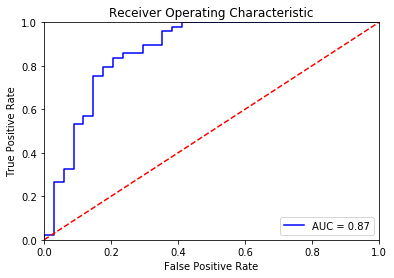

In [143]:
#ROC curve

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

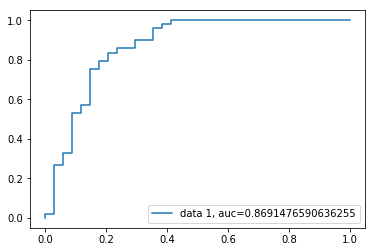

In [154]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [156]:
import scikitplot as skplt
import matplotlib.pyplot as plt

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_test,  y_pred_proba)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [37]:
kfold_validation_score_store

[[0.6937512499945504, 0.5476190476190477],
 [0.5981581523304894, 0.7380952352569217],
 [0.46875526791527156, 0.797619050457364],
 [0.4093853419735318, 0.8214285714285714],
 [0.3766857697850182, 0.8809523752757481],
 [0.3955249445266034, 0.8433734903852623],
 [0.35498455346348773, 0.8795180737254131],
 [0.474698047321963, 0.8192771148968891],
 [0.6671040955796299, 0.6144578255802752],
 [0.31596936447074614, 0.8915662664964975],
 [0.4391353979527232, 0.795180719300925]]

In [41]:
len(kfold_validation_score_store)

11

In [36]:
total_validation_loss = 0
total_validation_accu = 0

In [38]:
for k in kfold_validation_score_store:
    total_validation_loss += k[0]
    total_validation_accu += k[1]

In [42]:
total_validation_loss/len(kfold_validation_score_store)

0.472195653210365

In [43]:
total_validation_accu/len(kfold_validation_score_store)

0.7844625245839013

In [44]:
rounded_predections = model.predict_classes(x_test)

In [45]:
len(rounded_predections)

83

In [55]:
len(y_test)

83

In [102]:
cm = confusion_matrix(y_test,rounded_predections)

In [103]:
cm2 = confusion_matrix(rounded_predections,y_test)

In [104]:
cm1

array([[24, 10],
       [ 7, 42]])

In [105]:
cm2

array([[24,  7],
       [10, 42]])

In [106]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [107]:
TP

42

In [108]:
accuracy = (TP+TN)/83
print("accuracy: ",accuracy)

missclassafication_rate = 1-accuracy
print("missclassafication_rate: ",missclassafication_rate)

sensitivity = TP/(TP+FN)
print("Sensitivity/Recall: ",sensitivity)

spasificity = TN/(TN+FP)
print("Spacificity: ",spasificity)

precition = TP/(FP+TP)
print("Precition: ",precition)

prevalence = (FN+TP)/83
print("prevalence: ",prevalence)

PPV = TP/(TP+FP)
print("Positive Predicted Value: ",PPV)

NPV = TN/(TN+FN)
print("Negative Predicted Value: ",NPV)

beta = 0.5
f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
print("F Score: ",f_score)

accuracy:  0.7951807228915663
missclassafication_rate:  0.20481927710843373
Sensitivity/Recall:  0.8571428571428571
Spacificity:  0.7058823529411765
Precition:  0.8076923076923077
prevalence:  0.5903614457831325
Positive Predicted Value:  0.8076923076923077
Negative Predicted Value:  0.7741935483870968
F Score:  0.8316831683168315


In [136]:
print(classification_report(pred_class,y_test,target_names=terget_names))

              precision    recall  f1-score   support

          NO       0.71      0.77      0.74        31
         YES       0.86      0.81      0.83        52

   micro avg       0.80      0.80      0.80        83
   macro avg       0.78      0.79      0.79        83
weighted avg       0.80      0.80      0.80        83



In [128]:
fpr, tpr, thresholds = metrics.roc_curve(asd, pred_class, pos_label=2)
metrics.auc(fpr, tpr)

/home/sakib/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan

In [129]:
fpr

array([0.        , 0.62650602, 1.        ])

In [130]:
tpr

array([nan, nan, nan])

In [131]:
model.predict_classes(x_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [134]:
 #np.argmax(y_test,axis=1)

In [133]:
asd

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.])

In [117]:
y_test[0][0]

1.0

In [123]:
asd = []
#asd = np.array([])
for i in y_test:
    for j in i:
        asd.append(j)

In [126]:
asd = np.array(asd)


In [132]:
asd

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.])

In [77]:
#build the oos predection list and calculate the error
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final, out of sample score (RMSE): {}".format(score))

Final, out of sample score (RMSE): 0.44881939454625097


In [81]:
#write he cross-validated predection
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)

oosDF = pd.concat([df,oos_y,oos_pred],axis=1)
oosDF.to_csv("filename_write.csv",index=False)

# Log Loss Function

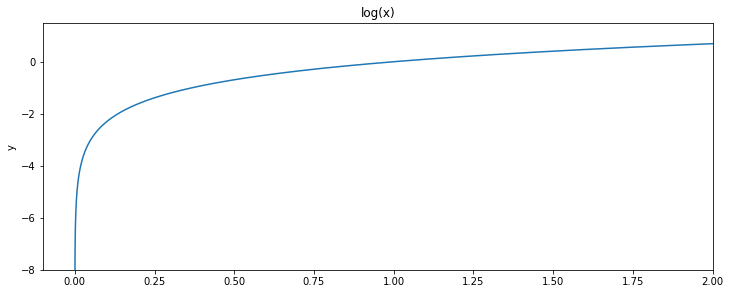

In [6]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import arange,sin,pi
import numpy as np

t = arange(1e-5,5.0,0.00001)
#t = arang(1.0,5.0,0.00001) #computer scientist
#t = arang(0.0,1.0,0.00001) #Data scientist

fig = figure(1,figsize=(12,10))
ax1 = fig.add_subplot(211)
ax1.plot(t,np.log(t))
ax1.set_ylim((-8,1.5))
ax1.set_xlim((-0.1,2))
ax1.set_ylabel("x")
ax1.set_ylabel("y")
ax1.set_title("log(x)")

show()